# NBA Clustering

    By Charlie Marshall
    
    1 April 2020

In [1]:
import pandas as pd
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.metrics import silhouette_score, silhouette_samples
from scipy.cluster.hierarchy import dendrogram, linkage

In [2]:
pergame=pd.read_csv('PerGame.csv')

In [3]:
pergame.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Steven Adams\adamsst01,C,26,OKC,58,58,27.0,4.5,7.6,0.591,...,0.590,3.4,6.0,9.4,2.4,0.9,1.1,1.5,1.9,10.9
1,Bam Adebayo\adebaba01,PF,22,MIA,65,65,34.4,6.3,11.1,0.567,...,0.690,2.5,8.0,10.5,5.1,1.2,1.3,2.8,2.5,16.2
2,LaMarcus Aldridge\aldrila01,C,34,SAS,53,53,33.1,7.4,15.0,0.493,...,0.827,1.9,5.5,7.4,2.4,0.7,1.6,1.4,2.4,18.9
3,Nickeil Alexander-Walker\alexani01,SG,21,NOP,41,0,12.2,1.9,5.5,0.339,...,0.607,0.2,1.8,2.0,1.8,0.3,0.2,1.0,1.1,5.1
4,Grayson Allen\allengr01,SG,24,MEM,30,0,16.6,2.6,5.9,0.449,...,0.857,0.2,2.0,2.2,1.4,0.2,0.0,0.8,1.2,7.4


In [4]:
advanced=pd.read_csv('Advanced.csv')

In [5]:
advanced.head()

,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,...,Unnamed: 18,OWS,DWS,WS,WS/48,Unnamed: 23,OBPM,DBPM,BPM,VORP
0,Steven Adams\adamsst01,C,26,OKC,58,1564,20.8,0.605,0.007,0.413,...,NaN,3.7,2.5,6.2,0.190,NaN,2.1,1.1,3.2,2.0
1,Bam Adebayo\adebaba01,PF,22,MIA,65,2235,20.6,0.606,0.018,0.476,...,NaN,4.6,3.6,8.1,0.175,NaN,1.6,2.1,3.6,3.2
2,LaMarcus Aldridge\aldrila01,C,34,SAS,53,1754,19.8,0.571,0.198,0.241,...,NaN,3.1,1.4,4.4,0.122,NaN,1.8,-0.5,1.3,1.5
3,Nickeil Alexander-Walker\alexani01,SG,21,NOP,41,501,7.6,0.441,0.515,0.123,...,NaN,-0.7,0.4,-0.4,-0.034,NaN,-3.5,-1.4,-4.9,-0.4
4,Grayson Allen\allengr01,SG,24,MEM,30,498,11.4,0.577,0.517,0.199,...,NaN,0.5,0.3,0.7,0.070,NaN,-1.0,-1.5,-2.6,-0.1


## Preprocessing

In [6]:
pergame=pergame.dropna()

In [7]:
pergame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 460 entries, 0 to 513
Data columns (total 29 columns):
Player    460 non-null object
Pos       460 non-null object
Age       460 non-null int64
Tm        460 non-null object
G         460 non-null int64
GS        460 non-null int64
MP        460 non-null float64
FG        460 non-null float64
FGA       460 non-null float64
FG%       460 non-null float64
3P        460 non-null float64
3PA       460 non-null float64
3P%       460 non-null float64
2P        460 non-null float64
2PA       460 non-null float64
2P%       460 non-null float64
eFG%      460 non-null float64
FT        460 non-null float64
FTA       460 non-null float64
FT%       460 non-null float64
ORB       460 non-null float64
DRB       460 non-null float64
TRB       460 non-null float64
AST       460 non-null float64
STL       460 non-null float64
BLK       460 non-null float64
TOV       460 non-null float64
PF        460 non-null float64
PTS       460 non-null float64
dtype

In [8]:
advanced=advanced.drop(['Unnamed: 18', 'Unnamed: 23'], axis=1)

In [9]:
advanced=advanced.dropna()

In [10]:
advanced.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 509 entries, 0 to 513
Data columns (total 26 columns):
Player    509 non-null object
Pos       509 non-null object
Age       509 non-null int64
Tm        509 non-null object
G         509 non-null int64
MP        509 non-null int64
PER       509 non-null float64
TS%       509 non-null float64
3PAr      509 non-null float64
FTr       509 non-null float64
ORB%      509 non-null float64
DRB%      509 non-null float64
TRB%      509 non-null float64
AST%      509 non-null float64
STL%      509 non-null float64
BLK%      509 non-null float64
TOV%      509 non-null float64
USG%      509 non-null float64
OWS       509 non-null float64
DWS       509 non-null float64
WS        509 non-null float64
WS/48     509 non-null float64
OBPM      509 non-null float64
DBPM      509 non-null float64
BPM       509 non-null float64
VORP      509 non-null float64
dtypes: float64(20), int64(3), object(3)
memory usage: 107.4+ KB


In [11]:
pergame=pergame.replace({'C-PF':'C', 'PF-SF':'PF', 'SF-PF':'SF', 'SF-SG':'SF'})

In [12]:
set(pergame.Pos)

{'C', 'PF', 'PG', 'SF', 'SG'}

In [13]:
advanced=advanced.replace({'C-PF':'C', 'PF-SF':'PF', 'SF-PF':'SF', 'SF-SG':'SF'})

In [14]:
set(advanced.Pos)

{'C', 'PF', 'PG', 'SF', 'SG'}

## Splitting Per Game By Position

In [15]:
pg=advanced[advanced.Pos == 'PG'].reset_index(drop=True)

In [16]:
pg.head()

,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,Ryan Arcidiacono\arcidry01,PG,25,CHI,58,930,9.0,0.551,0.627,0.173,...,13.5,12.5,0.7,0.7,1.4,0.070,-2.7,-0.1,-2.8,-0.2
1,D.J. Augustin\augusdj01,PG,32,ORL,49,1215,14.2,0.548,0.438,0.395,...,12.9,19.1,1.8,0.8,2.6,0.101,-0.3,-1.0,-1.4,0.2
2,Lonzo Ball\balllo01,PG,22,NOP,56,1817,13.7,0.529,0.578,0.107,...,20.7,18.6,0.7,1.9,2.6,0.068,0.4,0.6,1.0,1.3
3,J.J. Barea\bareajo01,PG,35,DAL,26,391,14.9,0.519,0.425,0.101,...,15.8,24.3,0.5,0.2,0.7,0.084,1.8,-2.7,-1.0,0.1
4,Patrick Beverley\beverpa01,PG,31,LAC,48,1299,12.3,0.554,0.609,0.126,...,15.7,13.0,1.4,2.0,3.4,0.126,-0.5,2.6,2.1,1.3


In [17]:
sg=advanced[advanced.Pos == 'SG'].reset_index(drop=True)

In [18]:
sg.head()

,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,Nickeil Alexander-Walker\alexani01,SG,21,NOP,41,501,7.6,0.441,0.515,0.123,...,14.3,22.8,-0.7,0.4,-0.4,-0.034,-3.5,-1.4,-4.9,-0.4
1,Grayson Allen\allengr01,SG,24,MEM,30,498,11.4,0.577,0.517,0.199,...,10.7,17.9,0.5,0.3,0.7,0.070,-1.0,-1.5,-2.6,-0.1
2,Kadeem Allen\allenka01,SG,27,NYK,10,117,14.0,0.512,0.364,0.250,...,14.1,20.6,0.1,0.1,0.1,0.053,0.0,-0.6,-0.6,0.0
3,Dwayne Bacon\bacondw01,SG,24,CHO,39,687,6.1,0.419,0.275,0.217,...,12.2,19.5,-1.2,0.4,-0.8,-0.053,-5.9,-0.9,-6.8,-0.8
4,RJ Barrett\barrerj01,SG,19,NYK,56,1704,10.7,0.479,0.271,0.349,...,12.9,24.0,-1.6,1.1,-0.5,-0.015,-2.8,-1.5,-4.3,-1.0


In [19]:
sf=advanced[advanced.Pos == 'SF'].reset_index(drop=True)

In [20]:
sf.head()

,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,Justin Anderson\anderju01,SF,26,BRK,3,17,-3.8,0.218,0.500,0.333,...,0.0,16.9,-0.1,0.0,-0.1,-0.167,-12.8,-2.3,-15.1,-0.1
1,Thanasis Antetokounmpo\antetth01,SF,27,MIL,18,93,14.2,0.528,0.194,0.417,...,20.5,23.8,0.0,0.2,0.2,0.083,-4.0,1.7,-2.3,0.0
2,OG Anunoby\anunoog01,SF,22,TOR,63,1897,13.2,0.598,0.408,0.163,...,11.7,14.4,1.8,3.3,5.1,0.130,-0.9,1.8,0.9,1.4
3,Trevor Ariza\arizatr01,SF,34,TOT,53,1493,11.0,0.593,0.639,0.228,...,13.6,11.9,1.3,1.3,2.6,0.084,-1.5,0.9,-0.5,0.6
4,Will Barton\bartowi01,SF,29,DEN,58,1916,15.7,0.549,0.390,0.180,...,9.9,20.0,2.4,2.1,4.5,0.113,1.2,-0.1,1.2,1.5


In [21]:
pf=advanced[advanced.Pos == 'PF'].reset_index(drop=True)

In [22]:
pf.head()

,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,Bam Adebayo\adebaba01,PF,22,MIA,65,2235,20.6,0.606,0.018,0.476,...,17.5,20.8,4.6,3.6,8.1,0.175,1.6,2.1,3.6,3.2
1,Al-Farouq Aminu\aminual01,PF,29,ORL,18,380,7.6,0.395,0.419,0.337,...,14.7,13.2,-0.4,0.5,0.1,0.016,-4.5,1.4,-3.1,-0.1
2,Kyle Anderson\anderky01,PF,26,MEM,59,1140,13.0,0.542,0.221,0.236,...,15.1,13.3,0.9,1.4,2.2,0.095,-1.3,1.9,0.6,0.7
3,Ryan Anderson\anderry01,PF,31,HOU,2,14,9.5,0.357,0.714,0.000,...,12.5,23.6,0.0,0.0,0.0,-0.031,-4.1,0.7,-3.4,0.0
4,Giannis Antetokounmpo\antetgi01,PF,25,MIL,57,1763,31.6,0.608,0.238,0.500,...,13.1,37.4,5.6,4.8,10.4,0.282,7.4,4.1,11.5,6.0


In [164]:
center=advanced[advanced.Pos == 'C'].reset_index(drop=True)

In [165]:
center.head()

,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,...,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,Clusters
0,Steven Adams\adamsst01,C,26,OKC,58,1564,20.8,0.605,0.007,0.413,...,17.2,3.7,2.5,6.2,0.190,2.1,1.1,3.2,2.0,8
1,LaMarcus Aldridge\aldrila01,C,34,SAS,53,1754,19.8,0.571,0.198,0.241,...,23.6,3.1,1.4,4.4,0.122,1.8,-0.5,1.3,1.5,2
2,Jarrett Allen\allenja01,C,21,BRK,64,1647,20.3,0.658,0.012,0.574,...,15.0,4.3,2.8,7.1,0.207,1.0,1.1,2.1,1.7,8
3,Deandre Ayton\aytonde01,C,21,PHO,30,996,20.4,0.571,0.006,0.168,...,24.3,1.1,1.3,2.4,0.117,0.8,-0.4,0.5,0.6,2
4,Mo Bamba\bambamo01,C,21,ORL,60,868,17.8,0.549,0.369,0.163,...,17.2,0.9,1.7,2.5,0.140,-1.1,1.7,0.5,0.6,2


# Clustering

## All NBA Players

### Removing all factors except those which will be clustered on

In [25]:
advanced.head()

,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,Steven Adams\adamsst01,C,26,OKC,58,1564,20.8,0.605,0.007,0.413,...,14.1,17.2,3.7,2.5,6.2,0.190,2.1,1.1,3.2,2.0
1,Bam Adebayo\adebaba01,PF,22,MIA,65,2235,20.6,0.606,0.018,0.476,...,17.5,20.8,4.6,3.6,8.1,0.175,1.6,2.1,3.6,3.2
2,LaMarcus Aldridge\aldrila01,C,34,SAS,53,1754,19.8,0.571,0.198,0.241,...,7.8,23.6,3.1,1.4,4.4,0.122,1.8,-0.5,1.3,1.5
3,Nickeil Alexander-Walker\alexani01,SG,21,NOP,41,501,7.6,0.441,0.515,0.123,...,14.3,22.8,-0.7,0.4,-0.4,-0.034,-3.5,-1.4,-4.9,-0.4
4,Grayson Allen\allengr01,SG,24,MEM,30,498,11.4,0.577,0.517,0.199,...,10.7,17.9,0.5,0.3,0.7,0.070,-1.0,-1.5,-2.6,-0.1


In [26]:
adv_clust=advanced.drop(['Player','Pos','Tm','G'], axis=1)

In [27]:
adv_clust.describe()

,Age,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
count,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,...,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000
mean,25.500982,922.078585,12.553438,0.529204,0.383495,0.251326,4.750688,15.243418,10.001768,13.162279,...,12.790177,18.573870,1.009823,0.932809,1.943222,0.068521,-1.579568,-0.210216,-1.786444,0.464637
std,4.058443,671.715630,6.961246,0.117137,0.209513,0.169382,3.976276,7.137076,4.956652,8.973971,...,6.361970,5.690693,1.476316,0.873699,2.152498,0.110439,3.777578,1.812917,4.818733,0.999551
min,19.000000,1.000000,-40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,6.000000,-1.700000,-0.100000,-1.300000,-1.036000,-24.400000,-15.100000,-39.500000,-1.700000
25%,22.000000,291.000000,9.300000,0.502000,0.257000,0.153000,2.000000,10.700000,6.400000,7.200000,...,9.700000,14.800000,0.000000,0.200000,0.200000,0.036000,-3.100000,-1.100000,-3.400000,-0.100000
50%,25.000000,895.000000,12.600000,0.546000,0.398000,0.227000,3.400000,14.100000,9.000000,10.400000,...,12.400000,17.600000,0.500000,0.700000,1.300000,0.082000,-1.100000,-0.200000,-1.200000,0.100000
75%,28.000000,1506.000000,16.300000,0.589000,0.522000,0.323000,6.500000,19.200000,12.400000,17.500000,...,14.900000,21.700000,1.800000,1.500000,3.200000,0.120000,0.500000,0.800000,0.800000,0.800000
max,43.000000,2243.000000,33.200000,0.776000,1.000000,1.500000,20.600000,52.800000,33.600000,49.700000,...,71.400000,42.800000,8.900000,4.800000,11.500000,0.451000,8.400000,7.200000,13.700000,6.300000


In [28]:
scaler = preprocessing.StandardScaler().fit(adv_clust)
dfNorm = scaler.transform(adv_clust)

/Users/charlesmarshall/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/charlesmarshall/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


In [29]:
maxClusters = 20
sse = []
for nClusters in range(2,maxClusters):
    kmeans = KMeans(n_clusters=nClusters, random_state=0).fit(dfNorm)
    sse.append(kmeans.inertia_)

In [30]:
print(sse)

[8865.459920710908, 7866.429753089227, 6901.654963183979, 6339.949114007647, 6033.91636026434, 5744.389159905153, 5525.51792614172, 5340.223488858159, 5163.494571413047, 5027.449089983545, 4875.767956840835, 4766.373592292823, 4637.8367450947335, 4482.922876646914, 4406.528136953311, 4274.189026551127, 4177.524102933525, 4077.757393886522]


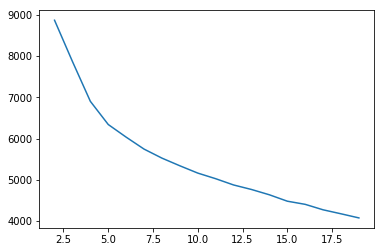

In [31]:
plt.plot(range(2,maxClusters),sse)

In [32]:
silh = []
for nClusters in range(2,maxClusters):
    kmeans = KMeans(n_clusters=nClusters, random_state=0).fit(dfNorm)
    silhouette_avg = silhouette_score(dfNorm, kmeans.labels_, sample_size = 10000)
    silh.append(silhouette_avg)

In [33]:
print(silh)

[0.1981618754365562, 0.19077003351572266, 0.21364668642810364, 0.15892976178022605, 0.15429972700527556, 0.12930993047029876, 0.1165162376277417, 0.1275525725427543, 0.12759471459687338, 0.10724179315232157, 0.10701622228060588, 0.09856400103811157, 0.10159412999978494, 0.10565543778097782, 0.10528572227409555, 0.09114339058334704, 0.10750017925329744, 0.10083075476420661]


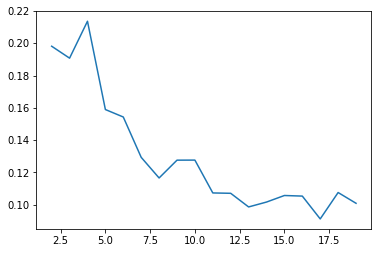

In [34]:
plt.plot(range(2,maxClusters),silh)

For n_clusters = 5 The average silhouette_score is : 0.15892976178022608
For n_clusters = 7 The average silhouette_score is : 0.12930993047029876
For n_clusters = 8 The average silhouette_score is : 0.1165162376277417
For n_clusters = 11 The average silhouette_score is : 0.10724179315232156
For n_clusters = 13 The average silhouette_score is : 0.09856400103811157
For n_clusters = 17 The average silhouette_score is : 0.09114339058334707


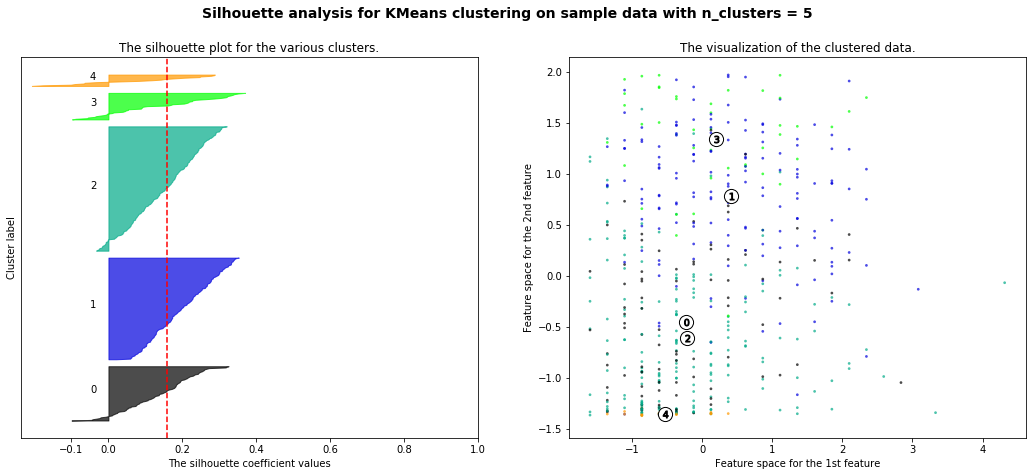

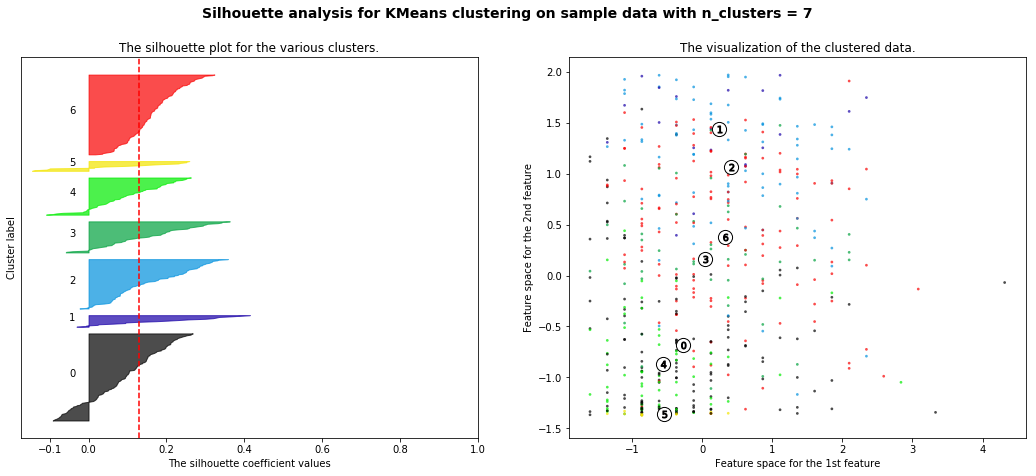

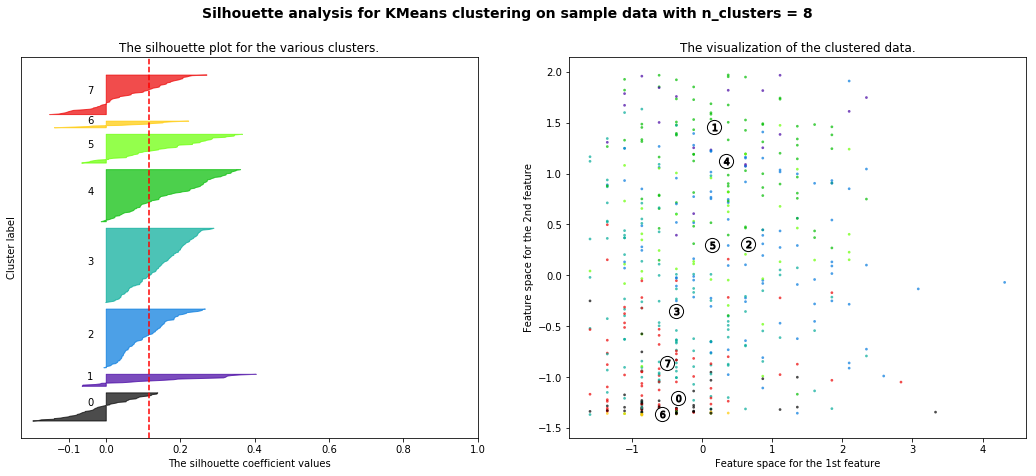

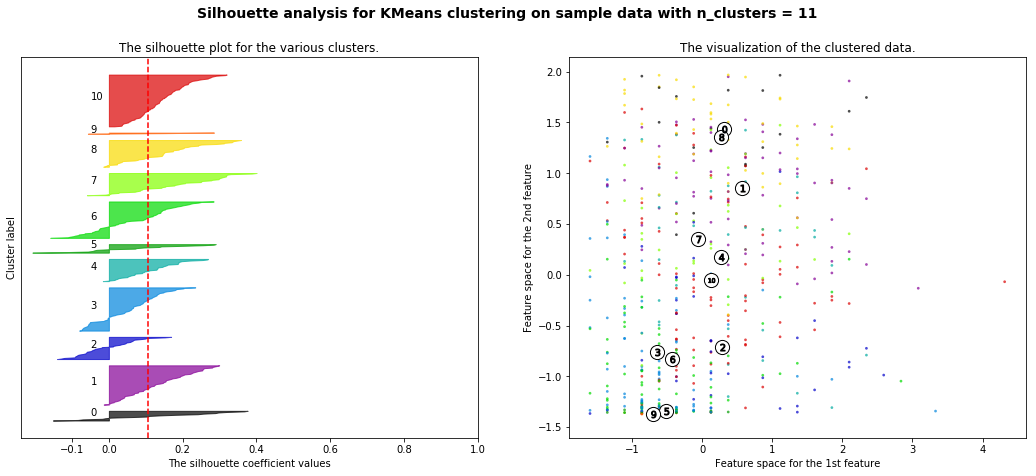

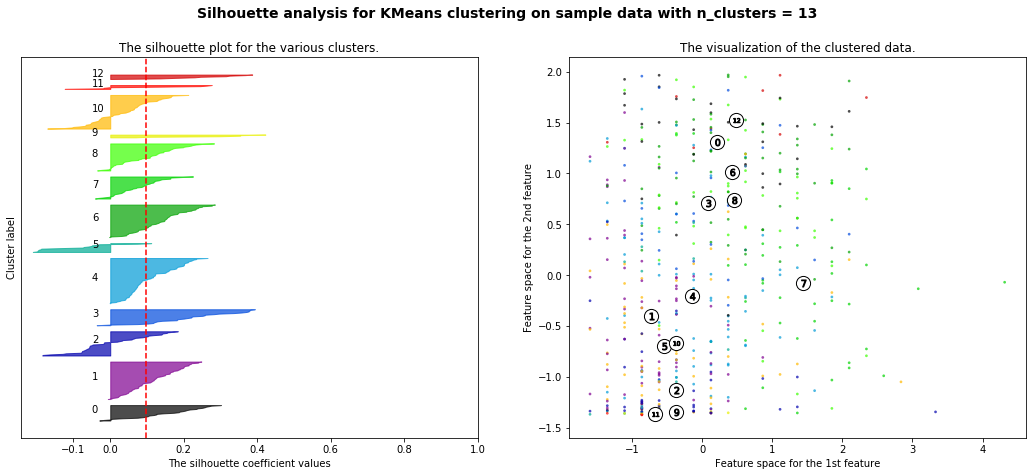

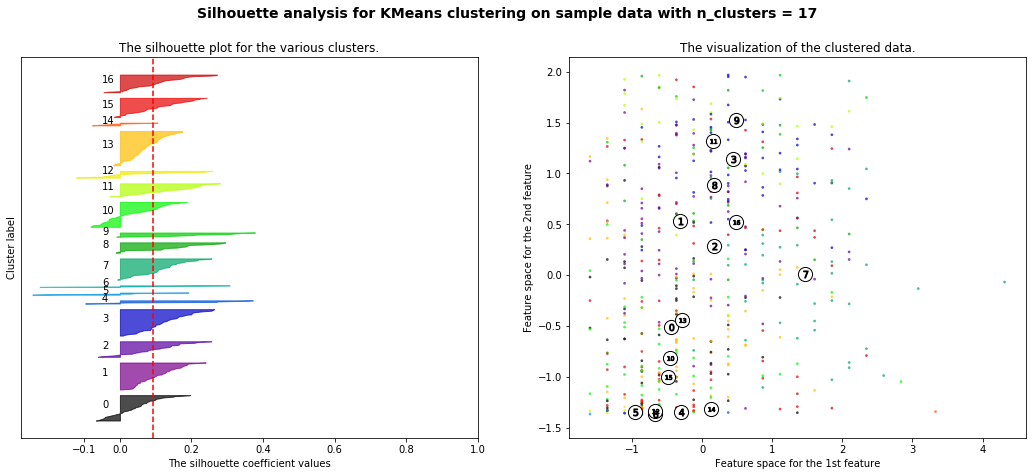

In [35]:
range_n_clusters = [5,7,8,11,13,17]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    #ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    #ax1.set_ylim([0, len(dfNorm) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels = kmeans.fit_predict(dfNorm)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(dfNorm, kmeans.labels_, sample_size = 10000)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(dfNorm, kmeans.labels_)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[kmeans.labels_ == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(dfNorm[:, 0], dfNorm[:, 1], marker='.', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k')

    # Labeling the clusters
    centers = kmeans.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

## K-Means Clustering

In [36]:
labels = KMeans(n_clusters=17, random_state=0).fit_predict(dfNorm)

In [37]:
adv_clust['Clusters'] = labels

In [38]:
advanced['Clusters'] = labels

In [39]:
adv_clust['Clusters'].value_counts()

13    67
1     53
3     52
0     50
10    49
7     42
15    38
16    35
2     31
11    26
8     21
12    14
9      9
4      7
14     6
5      5
6      4
Name: Clusters, dtype: int64

In [40]:
adv_clust.groupby('Clusters').mean()

,Age,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
Clusters,,,,,,,,,,,,,,,,,,,,,
0,23.700000,578.140000,11.246000,0.519060,0.362320,0.245540,5.772000,16.146000,10.926000,10.084000,...,14.246000,15.800000,0.136000,0.644000,0.786000,0.062020,-2.798000,0.712000,-2.070000,0.036000
1,24.188679,1276.169811,12.894340,0.556660,0.492528,0.179434,2.703774,12.811321,7.709434,11.264151,...,9.522642,19.571698,0.881132,0.843396,1.728302,0.072057,-0.409434,-0.835849,-1.245283,0.109434
2,26.161290,1111.967742,18.761290,0.599226,0.207548,0.290774,9.293548,21.835484,15.525806,10.764516,...,11.635484,18.935484,1.783871,1.390323,3.164516,0.151226,0.690323,0.677419,1.374194,0.812903
3,27.269231,1687.096154,14.657692,0.583692,0.500904,0.212615,3.259615,14.171154,8.748077,11.955769,...,10.565385,18.692308,2.175000,1.788462,3.955769,0.115269,0.505769,0.261538,0.778846,1.151923
4,24.285714,16.857143,-7.428571,0.200000,0.385714,0.000000,1.142857,13.928571,7.714286,6.414286,...,41.742857,12.742857,-0.085714,0.000000,-0.071429,-0.231714,-11.957143,-3.442857,-15.428571,-0.057143
5,21.600000,21.000000,5.420000,0.178000,0.508800,0.130000,0.000000,7.440000,3.740000,16.060000,...,6.760000,12.720000,-0.060000,0.020000,-0.040000,-0.046200,-7.280000,3.660000,-3.620000,-0.040000
6,22.750000,8.250000,-20.700000,0.109500,0.390000,0.416750,0.000000,5.925000,2.950000,1.675000,...,6.450000,32.100000,-0.075000,0.000000,-0.075000,-0.616500,-17.325000,-10.275000,-27.625000,-0.050000
7,31.452381,930.666667,10.526190,0.549024,0.582310,0.169786,3.895238,15.342857,9.688095,8.811905,...,12.261905,14.371429,0.488095,1.016667,1.502381,0.079048,-1.778571,0.330952,-1.447619,0.116667
8,26.190476,1519.857143,21.576190,0.635381,0.066000,0.408333,11.990476,27.214286,19.690476,10.709524,...,13.352381,19.280952,3.528571,2.542857,6.071429,0.194810,1.585714,1.161905,2.747619,1.857143


In [41]:
advanced[advanced.Clusters == 0]

,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,...,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,Clusters
7,Al-Farouq Aminu\aminual01,PF,29,ORL,18,380,7.6,0.395,0.419,0.337,...,13.2,-0.4,0.5,0.1,0.016,-4.5,1.4,-3.1,-0.1,0
9,Kyle Anderson\anderky01,PF,26,MEM,59,1140,13.0,0.542,0.221,0.236,...,13.3,0.9,1.4,2.2,0.095,-1.3,1.9,0.6,0.7,0
10,Ryan Anderson\anderry01,PF,31,HOU,2,14,9.5,0.357,0.714,0.000,...,23.6,0.0,0.0,0.0,-0.031,-4.1,0.7,-3.4,0.0,0
13,Thanasis Antetokounmpo\antetth01,SF,27,MIL,18,93,14.2,0.528,0.194,0.417,...,23.8,0.0,0.2,0.2,0.083,-4.0,1.7,-2.3,0.0,0
32,Darius Bazley\bazleda01,PF,19,OKC,53,909,8.1,0.475,0.435,0.204,...,14.1,-0.8,1.2,0.4,0.019,-3.1,0.6,-2.5,-0.1,0
37,DeAndre' Bembry\bembrde01,SG,25,ATL,43,915,9.6,0.500,0.285,0.211,...,14.0,-0.5,0.7,0.2,0.011,-3.5,1.0,-2.4,-0.1,0
38,Dragan Bender\bendedr01,SF,22,TOT,16,286,11.0,0.545,0.467,0.152,...,17.7,0.0,0.3,0.3,0.053,-3.0,0.1,-2.9,-0.1,0
51,Isaac Bonga\bongais01,SF,20,WAS,58,1025,10.7,0.627,0.299,0.348,...,10.3,1.3,0.4,1.7,0.081,-2.4,0.0,-2.4,-0.1,0
66,Bruce Brown\brownbr01,SG,23,DET,58,1634,11.9,0.518,0.215,0.266,...,16.0,0.8,1.4,2.1,0.062,-2.0,0.8,-1.2,0.3,0
70,Sterling Brown\brownst02,SF,24,MIL,45,665,9.3,0.478,0.523,0.161,...,16.7,-0.4,1.3,1.0,0.071,-3.1,1.0,-2.0,0.0,0


In [42]:
advanced[advanced.Clusters == 1]

,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,...,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,Clusters
28,Keita Bates-Diop\bateske01,SF,24,TOT,39,665,12.6,0.541,0.452,0.332,...,15.6,0.6,0.5,1.1,0.081,-0.8,-0.1,-0.8,0.2,1
34,Malik Beasley\beaslma01,SG,23,TOT,55,1209,12.7,0.546,0.517,0.124,...,21.8,0.4,0.9,1.3,0.053,-0.7,-1.3,-2.0,0.0,1
46,Bogdan Bogdanović\bogdabo01,SG,27,SAC,53,1510,14.3,0.560,0.595,0.164,...,22.3,1.2,1.1,2.4,0.075,0.7,-0.3,0.4,0.9,1
61,Miles Bridges\bridgmi02,SF,21,CHO,65,1995,12.1,0.520,0.398,0.174,...,20.0,0.3,1.3,1.6,0.038,-1.5,-1.0,-2.5,-0.3,1
65,Dillon Brooks\brookdi01,SG,24,MEM,65,1851,11.1,0.508,0.387,0.192,...,25.0,-0.3,1.3,1.0,0.025,-2.8,-1.5,-4.3,-1.1,1
71,Troy Brown Jr.\browntr01,SG,20,WAS,61,1519,13.7,0.534,0.287,0.225,...,17.0,1.2,0.9,2.2,0.069,-0.8,-0.4,-1.3,0.3,1
152,Bryn Forbes\forbebr01,SG,26,SAS,63,1579,11.2,0.570,0.656,0.155,...,18.6,1.2,0.2,1.5,0.045,-0.6,-2.1,-2.7,-0.3,1
162,Langston Galloway\gallola01,SG,28,DET,66,1702,12.3,0.584,0.611,0.157,...,15.9,2.4,0.7,3.1,0.087,0.1,-0.9,-0.8,0.5,1
186,Rui Hachimura\hachiru01,PF,21,WAS,41,1217,13.9,0.543,0.160,0.243,...,18.7,1.3,0.4,1.7,0.066,-1.1,-1.9,-3.0,-0.3,1
189,Dusty Hannahs\hannadu01,SG,26,MEM,2,13,21.3,0.607,0.333,0.222,...,31.6,0.0,0.0,0.0,0.146,5.2,-2.1,3.1,0.0,1


In [43]:
advanced[advanced.Clusters == 2]

,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,...,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,Clusters
2,LaMarcus Aldridge\aldrila01,C,34,SAS,53,1754,19.8,0.571,0.198,0.241,...,23.6,3.1,1.4,4.4,0.122,1.8,-0.5,1.3,1.5,2
19,Deandre Ayton\aytonde01,C,21,PHO,30,996,20.4,0.571,0.006,0.168,...,24.3,1.1,1.3,2.4,0.117,0.8,-0.4,0.5,0.6,2
23,Mo Bamba\bambamo01,C,21,ORL,60,868,17.8,0.549,0.369,0.163,...,17.2,0.9,1.7,2.5,0.140,-1.1,1.7,0.5,0.6,2
53,Chris Boucher\bouchch01,PF,27,TOR,55,724,19.8,0.570,0.381,0.396,...,19.4,1.7,1.5,3.2,0.214,0.4,1.0,1.4,0.6,2
73,Thomas Bryant\bryanth01,C,22,WAS,38,901,20.0,0.659,0.176,0.309,...,18.3,2.4,0.5,2.9,0.153,2.1,-1.2,0.9,0.7,2
89,Willie Cauley-Stein\caulewi01,C,26,TOT,54,1097,17.0,0.589,0.003,0.219,...,14.4,1.5,1.5,3.0,0.129,-1.2,1.7,0.5,0.7,2
95,Marquese Chriss\chrisma01,PF,22,GSW,59,1196,19.4,0.604,0.101,0.405,...,19.0,2.1,1.3,3.4,0.136,0.1,0.5,0.6,0.8,2
97,Brandon Clarke\clarkbr01,PF,23,MEM,50,1086,21.8,0.670,0.127,0.228,...,19.0,3.1,1.3,4.4,0.192,2.8,0.7,3.5,1.5,2
103,John Collins\collijo01,PF,22,ATL,41,1363,23.5,0.659,0.243,0.248,...,22.7,3.8,1.1,4.9,0.174,3.7,-0.7,3.1,1.7,2
125,Gorgui Dieng\dienggo01,C,30,TOT,58,1012,17.4,0.564,0.414,0.242,...,17.7,1.1,1.6,2.7,0.128,0.0,1.8,1.8,0.9,2


In [44]:
advanced[advanced.Clusters == 3]

,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,...,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,Clusters
15,OG Anunoby\anunoog01,SF,22,TOR,63,1897,13.2,0.598,0.408,0.163,...,14.4,1.8,3.3,5.1,0.130,-0.9,1.8,0.9,1.4,3
25,Harrison Barnes\barneha02,PF,27,SAC,64,2231,13.3,0.575,0.342,0.343,...,17.6,3.1,1.1,4.2,0.091,0.0,-1.2,-1.2,0.5,3
27,Will Barton\bartowi01,SF,29,DEN,58,1916,15.7,0.549,0.390,0.180,...,20.0,2.4,2.1,4.5,0.113,1.2,-0.1,1.2,1.5,3
39,Dāvis Bertāns\bertada01,PF,27,WAS,54,1583,15.5,0.628,0.774,0.200,...,19.0,3.0,0.5,3.5,0.106,2.7,-1.8,0.9,1.1,3
40,Patrick Beverley\beverpa01,PG,31,LAC,48,1299,12.3,0.554,0.609,0.126,...,13.0,1.4,2.0,3.4,0.126,-0.5,2.6,2.1,1.3,3
44,Nemanja Bjelica\bjeline01,PF,31,SAC,64,1821,15.6,0.597,0.488,0.121,...,17.4,3.0,1.7,4.7,0.125,1.2,0.4,1.6,1.7,3
47,Bojan Bogdanović\bogdabo02,SF,30,UTA,63,2083,15.7,0.603,0.489,0.296,...,25.6,2.7,1.6,4.3,0.099,1.6,-1.5,0.2,1.1,3
60,Mikal Bridges\bridgmi01,SF,23,PHO,65,1772,13.0,0.623,0.391,0.258,...,12.4,2.2,1.9,4.1,0.111,-0.7,1.5,0.8,1.3,3
68,Jaylen Brown\brownja02,SF,23,BOS,50,1702,17.1,0.589,0.364,0.280,...,24.7,2.1,2.3,4.5,0.126,1.0,-0.1,0.9,1.2,3
76,Alec Burks\burksal01,SG,28,TOT,59,1612,16.0,0.549,0.389,0.358,...,23.8,1.9,1.1,2.9,0.088,0.6,-0.7,-0.2,0.7,3


In [45]:
advanced[advanced.Clusters == 4]

,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,...,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,Clusters
93,Zylan Cheatham\cheatzy01,SF,24,NOP,3,31,0.1,0.4,0.200,0.0,...,10.5,-0.1,0.0,-0.1,-0.080,-10.2,0.1,-10.2,-0.1,4
177,Josh Gray\grayjo01,PG,26,NOP,2,23,-5.0,0.5,0.000,0.0,...,12.4,-0.1,0.0,-0.1,-0.224,-11.3,-4.7,-16.0,-0.1,4
225,William Howard\howarwi01,SG,26,HOU,2,13,-12.7,0.0,1.000,0.0,...,15.9,-0.1,0.0,-0.1,-0.354,-14.9,-5.7,-20.7,-0.1,4
264,Stanton Kidd\kiddst01,SF,27,UTA,4,15,-13.7,0.0,0.333,0.0,...,14.6,-0.1,0.0,-0.1,-0.327,-15.6,-1.3,-16.9,-0.1,4
299,Daryl Macon\maconda01,SG,24,MIA,4,14,-3.1,0.5,0.667,0.0,...,15.8,0.0,0.0,0.0,-0.161,-7.0,-4.4,-11.4,0.0,4
375,Miye Oni\onimi01,SG,22,UTA,5,11,-9.9,0.0,0.500,0.0,...,12.0,-0.1,0.0,-0.1,-0.285,-12.7,-4.6,-17.3,0.0,4
416,Isaiah Roby\robyis01,SF,21,OKC,3,11,-7.7,0.0,0.000,0.0,...,8.0,-0.1,0.0,0.0,-0.191,-12.0,-3.5,-15.5,0.0,4


In [46]:
advanced[advanced.Clusters == 5]

,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,...,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,Clusters
92,Joe Chealey\chealjo01,PG,24,CHO,4,33,-2.8,0.127,0.571,0.286,...,13.2,-0.2,0.0,-0.1,-0.189,-14.3,1.7,-12.6,-0.1,5
222,Talen Horton-Tucker\hortota01,SG,19,LAL,2,5,14.8,0.000,1.000,0.000,...,8.4,0.0,0.0,0.0,0.110,0.6,7.2,7.8,0.0,5
309,Jeremiah Martin\martije02,PG,23,BRK,3,16,5.9,0.200,0.200,0.000,...,13.1,0.0,0.0,0.0,-0.040,-6.6,3.6,-3.0,0.0,5
339,Matt Mooney\moonema01,SG,22,CLE,4,19,8.1,0.250,0.500,0.000,...,9.0,0.0,0.0,0.0,0.006,-5.3,5.0,-0.3,0.0,5
444,Zhaire Smith\smithzh01,SG,20,PHI,7,32,1.1,0.313,0.273,0.364,...,19.9,-0.1,0.1,-0.1,-0.118,-10.8,0.8,-10.0,-0.1,5


In [47]:
advanced[advanced.Clusters == 6]

,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,...,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,Clusters
209,Kevin Hervey\herveke01,PF,23,OKC,7,19,-14.9,0.091,0.727,0.000,...,25.5,-0.2,0.0,-0.2,-0.471,-13.4,-6.5,-19.9,-0.1,6
280,Vic Law\lawvi01,SF,24,ORL,5,9,-16.6,0.000,0.333,0.667,...,18.6,-0.1,0.0,-0.1,-0.456,-17.0,-8.2,-25.2,-0.1,6
358,Malik Newman\newmama01,SG,22,CLE,1,4,-11.3,0.347,0.500,1.000,...,41.5,0.0,0.0,0.0,-0.503,-14.5,-11.3,-25.9,0.0,6
405,Josh Reaves\reavejo02,SG,22,DAL,2,1,-40.0,0.000,0.000,0.000,...,42.8,0.0,0.0,0.0,-1.036,-24.4,-15.1,-39.5,0.0,6


In [48]:
advanced[advanced.Clusters == 7]

,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,...,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,Clusters
14,Carmelo Anthony\anthoca01,PF,35,POR,50,1623,12.2,0.517,0.286,0.197,...,21.6,0.1,0.9,1.0,0.029,-1.9,-1.8,-3.7,-0.7,7
17,Trevor Ariza\arizatr01,SF,34,TOT,53,1493,11.0,0.593,0.639,0.228,...,11.9,1.3,1.3,2.6,0.084,-1.5,0.9,-0.5,0.6,7
29,Nicolas Batum\batumni01,SF,31,CHO,22,505,9.2,0.463,0.605,0.123,...,9.4,0.2,0.4,0.6,0.055,-2.7,0.9,-1.9,0.0,7
30,Aron Baynes\baynear01,C,33,PHO,42,934,15.1,0.581,0.441,0.197,...,21.1,1.3,0.7,2.0,0.103,-0.2,-0.9,-1.1,0.2,7
31,Kent Bazemore\bazemke01,SF,30,TOT,64,1604,9.2,0.500,0.461,0.287,...,17.2,-0.8,1.5,0.7,0.020,-3.4,0.4,-3.0,-0.4,7
56,Avery Bradley\bradlav01,SG,29,LAL,49,1186,8.9,0.537,0.452,0.063,...,15.7,0.2,1.4,1.6,0.066,-2.9,0.5,-2.4,-0.1,7
63,Ryan Broekhoff\broekry01,SG,29,DAL,17,180,13.1,0.568,0.864,0.136,...,16.3,0.2,0.2,0.4,0.116,0.4,0.4,0.9,0.1,7
83,DeMarre Carroll\carrode01,SF,33,TOT,21,231,8.5,0.523,0.500,0.667,...,15.8,0.0,0.1,0.1,0.026,-3.4,-1.1,-4.5,-0.1,7
85,Vince Carter\cartevi01,SF,43,ATL,60,876,7.6,0.470,0.664,0.095,...,16.6,-0.6,0.4,-0.2,-0.011,-3.1,-1.2,-4.3,-0.5,7
91,Wilson Chandler\chandwi01,SF,32,BRK,35,734,7.4,0.531,0.661,0.126,...,13.0,-0.1,0.9,0.8,0.050,-3.9,1.0,-2.9,-0.2,7


In [49]:
advanced[advanced.Clusters == 8]

,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,...,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,Clusters
0,Steven Adams\adamsst01,C,26,OKC,58,1564,20.8,0.605,0.007,0.413,...,17.2,3.7,2.5,6.2,0.190,2.1,1.1,3.2,2.0,8
1,Bam Adebayo\adebaba01,PF,22,MIA,65,2235,20.6,0.606,0.018,0.476,...,20.8,4.6,3.6,8.1,0.175,1.6,2.1,3.6,3.2,8
5,Jarrett Allen\allenja01,C,21,BRK,64,1647,20.3,0.658,0.012,0.574,...,15.0,4.3,2.8,7.1,0.207,1.0,1.1,2.1,1.7,8
82,Clint Capela\capelca01,C,25,HOU,39,1279,20.7,0.626,0.000,0.268,...,16.0,2.9,2.1,5.0,0.186,1.1,0.4,1.5,1.1,8
134,Andre Drummond\drumman01,C,26,TOT,57,1879,22.0,0.553,0.045,0.375,...,25.9,0.7,3.6,4.3,0.109,-0.1,1.1,1.0,1.4,8
140,Joel Embiid\embiijo01,C,25,PHI,44,1329,26.0,0.593,0.230,0.545,...,32.6,3.2,2.4,5.6,0.203,4.1,1.2,5.2,2.4,8
170,Rudy Gobert\goberru01,C,27,UTA,62,2142,21.7,0.700,0.000,0.725,...,16.1,6.0,4.0,10.0,0.225,1.8,1.9,3.7,3.1,8
194,Montrezl Harrell\harremo01,C,26,LAC,63,1749,23.1,0.607,0.022,0.432,...,25.5,4.5,2.5,7.0,0.193,2.4,0.5,2.9,2.2,8
224,Dwight Howard\howardw01,C,34,LAL,62,1193,18.7,0.696,0.019,0.700,...,14.5,2.6,2.4,5.0,0.202,-0.8,1.4,0.5,0.8,8
258,DeAndre Jordan\jordade01,C,31,BRK,56,1234,20.0,0.682,0.000,0.425,...,14.1,3.0,2.3,5.3,0.204,1.1,1.8,2.8,1.5,8


In [50]:
advanced[advanced.Clusters == 9]

,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,...,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,Clusters
11,Giannis Antetokounmpo\antetgi01,PF,25,MIL,57,1763,31.6,0.608,0.238,0.500,...,37.4,5.6,4.8,10.4,0.282,7.4,4.1,11.5,6.0,9
78,Jimmy Butler\butleji01,SF,30,MIA,54,1851,23.4,0.583,0.162,0.679,...,25.2,6.0,2.5,8.5,0.219,4.0,1.3,5.2,3.4,9
117,Anthony Davis\davisan02,PF,26,LAL,55,1889,28.2,0.614,0.195,0.460,...,29.7,6.2,4.1,10.3,0.262,5.8,2.8,8.5,5.0,9
128,Luka Dončić\doncilu01,PG,20,DAL,54,1799,27.7,0.584,0.442,0.442,...,37.0,5.8,2.3,8.1,0.215,7.3,1.1,8.4,4.7,9
191,James Harden\hardeja01,SG,30,HOU,61,2241,28.4,0.616,0.555,0.519,...,36.4,8.7,2.7,11.5,0.245,7.9,1.2,9.0,6.3,9
243,LeBron James\jamesle01,PG,35,LAL,60,2094,26.0,0.582,0.324,0.292,...,31.6,6.1,3.4,9.5,0.218,6.8,1.9,8.7,5.7,9
254,Nikola Jokić\jokicni01,C,24,DEN,65,2101,25.0,0.604,0.233,0.277,...,26.6,6.0,3.2,9.2,0.209,5.4,2.3,7.6,5.1,9
287,Kawhi Leonard\leonaka01,SF,28,LAC,51,1643,26.7,0.585,0.287,0.344,...,33.2,4.6,3.0,7.6,0.222,6.5,2.5,9.0,4.6,9
290,Damian Lillard\lillada01,PG,29,POR,58,2140,26.2,0.619,0.493,0.377,...,30.2,8.9,0.7,9.6,0.215,7.9,-0.7,7.2,5.0,9


In [51]:
advanced[advanced.Clusters == 10]

,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,...,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,Clusters
21,Marvin Bagley III\baglema01,PF,20,SAC,13,334,15.7,0.512,0.132,0.186,...,25.9,0.0,0.4,0.4,0.055,-2.1,-1.3,-3.4,-0.1,10
36,Jordan Bell\belljo01,C,25,TOT,29,256,13.9,0.577,0.179,0.463,...,16.4,0.2,0.2,0.4,0.070,-1.4,-1.1,-2.5,0.0,10
41,Khem Birch\birchkh01,C,27,ORL,40,777,10.1,0.529,0.009,0.583,...,9.3,0.7,0.8,1.5,0.092,-3.3,0.3,-3.0,-0.2,10
42,Goga Bitadze\bitadgo01,C,20,IND,49,410,12.2,0.530,0.279,0.256,...,18.1,-0.1,0.7,0.6,0.069,-4.0,1.5,-2.5,0.0,10
43,Bismack Biyombo\biyombi01,C,27,CHO,53,1029,16.1,0.570,0.000,0.543,...,16.8,1.5,0.9,2.4,0.113,-1.8,-0.7,-2.5,-0.1,10
57,Tony Bradley\bradlto01,C,22,UTA,50,535,21.8,0.675,0.006,0.258,...,16.1,1.8,0.9,2.7,0.242,0.9,0.4,1.3,0.4,10
86,Wendell Carter Jr.\cartewe01,C,20,CHI,43,1256,15.5,0.590,0.085,0.443,...,16.4,1.7,1.6,3.3,0.127,-2.1,-0.3,-2.4,-0.1,10
90,Tyson Chandler\chandty01,C,37,HOU,26,219,10.8,0.717,0.000,0.722,...,6.0,0.3,0.3,0.6,0.130,-2.5,1.1,-1.4,0.0,10
99,Nicolas Claxton\claxtni01,PF,20,BRK,15,187,14.9,0.577,0.146,0.438,...,14.8,0.3,0.2,0.5,0.124,-0.7,0.0,-0.7,0.1,10
108,Tyler Cook\cookty01,PF,22,CLE,11,35,23.8,0.752,0.000,0.600,...,16.7,0.2,0.0,0.2,0.244,3.0,-0.6,2.4,0.0,10


In [52]:
advanced[advanced.Clusters == 11]

,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,...,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,Clusters
33,Bradley Beal\bealbr01,SG,26,WAS,57,2053,23.1,0.579,0.369,0.351,...,34.4,4.6,0.5,5.1,0.119,5.3,-2.4,2.9,2.5,11
45,Eric Bledsoe\bledser01,PG,30,MIL,56,1524,18.1,0.579,0.304,0.292,...,24.0,2.4,2.9,5.3,0.168,1.1,1.1,2.2,1.6,11
52,Devin Booker\bookede01,SG,23,PHO,62,2241,19.8,0.617,0.313,0.395,...,29.5,4.8,1.2,6.0,0.129,3.1,-1.4,1.7,2.1,11
122,DeMar DeRozan\derozde01,SF,30,SAS,61,2091,21.3,0.597,0.031,0.419,...,26.6,5.1,1.1,6.2,0.143,2.1,-0.5,1.6,1.9,11
126,Spencer Dinwiddie\dinwisp01,SG,26,BRK,64,1994,17.9,0.541,0.392,0.437,...,29.2,3.4,1.7,5.1,0.123,2.6,-0.8,1.7,1.9,11
154,De'Aaron Fox\foxde01,PG,22,SAC,45,1426,20.3,0.556,0.221,0.442,...,29.6,2.1,1.3,3.5,0.117,2.1,-0.3,1.8,1.4,11
161,Danilo Gallinari\gallida01,PF,31,OKC,55,1690,19.4,0.611,0.538,0.352,...,24.4,4.1,1.6,5.7,0.163,4.1,-0.9,3.2,2.2,11
166,Paul George\georgpa01,SF,29,LAC,42,1222,20.5,0.582,0.494,0.277,...,29.6,1.9,2.0,3.9,0.153,3.4,1.1,4.5,2.0,11
169,Shai Gilgeous-Alexander\gilgesh01,SG,21,OKC,63,2214,17.8,0.566,0.237,0.339,...,23.7,2.9,2.6,5.5,0.120,1.4,0.2,1.6,2.0,11
216,Jrue Holiday\holidjr01,SG,29,NOP,55,1922,17.5,0.535,0.346,0.183,...,24.7,2.1,1.8,4.0,0.099,1.9,0.3,2.3,2.1,11


In [53]:
advanced[advanced.Clusters == 12]

,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,...,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,Clusters
8,Justin Anderson\anderju01,SF,26,BRK,3,17,-3.8,0.218,0.500,0.333,...,16.9,-0.1,0.0,-0.1,-0.167,-12.8,-2.3,-15.1,-0.1,12
50,Jordan Bone\bonejo01,PG,22,DET,10,53,0.8,0.300,0.500,0.000,...,18.1,-0.1,0.0,-0.1,-0.118,-9.0,-2.9,-11.9,-0.1,12
54,Brian Bowen\bowenbr02,SG,21,IND,5,29,-2.0,0.222,0.222,0.000,...,15.2,-0.1,0.0,-0.1,-0.154,-9.7,-2.1,-11.8,-0.1,12
59,Ignas Brazdeikis\brazdig01,SF,21,NYK,9,53,3.3,0.351,0.409,0.227,...,21.0,-0.1,0.0,-0.1,-0.109,-5.0,-3.9,-8.9,-0.1,12
138,Henry Ellenson\ellenhe01,PF,23,BRK,5,15,-1.2,0.143,0.571,0.000,...,19.5,-0.1,0.0,-0.1,-0.180,-7.9,-3.1,-11.0,0.0,12
187,Devon Hall\hallde01,SG,24,OKC,5,20,3.6,0.370,0.400,0.800,...,17.1,0.0,0.0,0.0,-0.064,-6.2,-3.6,-9.7,0.0,12
193,Jared Harper\harpeja01,PG,22,PHO,3,8,-5.3,0.250,0.500,0.000,...,21.3,0.0,0.0,0.0,-0.253,-10.2,-5.7,-15.8,0.0,12
283,Jalen Lecque\lecquja01,PG,19,PHO,4,26,5.0,0.460,0.400,0.200,...,19.4,0.0,0.0,0.0,-0.042,-5.7,-3.6,-9.3,0.0,12
424,Luka Šamanić\samanlu01,PF,20,SAS,1,12,-3.4,0.000,0.500,0.000,...,14.5,-0.1,0.0,-0.1,-0.252,-7.4,-4.5,-11.9,0.0,12
434,Marial Shayok\shayoma01,SG,24,PHI,2,10,-2.0,0.300,0.600,0.000,...,25.9,-0.1,0.0,0.0,-0.227,-8.7,-2.6,-11.3,0.0,12


In [54]:
advanced[advanced.Clusters == 13]

,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,...,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,Clusters
4,Grayson Allen\allengr01,SG,24,MEM,30,498,11.4,0.577,0.517,0.199,...,17.9,0.5,0.3,0.7,0.070,-1.0,-1.5,-2.6,-0.1,13
6,Kadeem Allen\allenka01,SG,27,NYK,10,117,14.0,0.512,0.364,0.250,...,20.6,0.1,0.1,0.1,0.053,0.0,-0.6,-0.6,0.0,13
16,Ryan Arcidiacono\arcidry01,PG,25,CHI,58,930,9.0,0.551,0.627,0.173,...,12.5,0.7,0.7,1.4,0.070,-2.7,-0.1,-2.8,-0.2,13
26,RJ Barrett\barrerj01,SG,19,NYK,56,1704,10.7,0.479,0.271,0.349,...,24.0,-1.6,1.1,-0.5,-0.015,-2.8,-1.5,-4.3,-1.0,13
35,Marco Belinelli\belinma01,SG,33,SAS,52,779,10.2,0.521,0.572,0.151,...,17.0,0.4,0.1,0.6,0.035,-1.0,-1.9,-2.9,-0.2,13
67,Charlie Brown\brownch02,SG,22,ATL,10,40,11.1,0.472,0.474,0.263,...,25.1,0.0,0.0,0.0,-0.028,-1.1,-1.4,-2.5,0.0,13
74,Reggie Bullock\bullore01,SG,28,NYK,29,684,9.3,0.502,0.496,0.094,...,15.6,0.2,0.3,0.5,0.036,-2.7,-0.3,-3.0,-0.2,13
75,Trey Burke\burketr01,PG,27,PHI,25,329,15.4,0.545,0.299,0.142,...,19.3,0.6,0.2,0.9,0.129,0.7,-1.1,-0.5,0.1,13
100,Chris Clemons\clemoch01,SG,22,HOU,29,251,12.6,0.546,0.746,0.056,...,24.0,0.1,0.2,0.2,0.046,0.4,-1.7,-1.3,0.1,13
104,Zach Collins\colliza01,PF,22,POR,3,86,9.0,0.624,0.368,0.316,...,13.6,0.1,0.0,0.1,0.045,-1.1,-0.7,-1.7,0.0,13


In [55]:
advanced[advanced.Clusters == 14]

,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,...,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,Clusters
69,Moses Brown\brownmo01,C,20,POR,9,33,6.7,0.407,0.000,0.800,...,21.2,-0.1,0.0,0.0,-0.062,-8.2,-1.7,-9.9,-0.1,14
188,Donta Hall\halldo01,PF,22,DET,4,48,7.3,0.452,0.000,1.500,...,7.9,0.0,0.0,0.1,0.067,-5.6,-1.4,-7.1,-0.1,14
201,Udonis Haslem\hasleud01,PF,39,MIA,3,21,3.0,0.322,0.333,0.667,...,16.3,0.0,0.0,0.0,-0.032,-9.7,-3.0,-12.7,-0.1,14
205,Dewan Hernandez\hernade01,C,23,TOR,4,11,4.2,0.340,0.200,0.400,...,26.8,0.0,0.0,0.0,0.003,-18.3,-3.0,-21.3,-0.1,14
244,Amile Jefferson\jeffeam01,PF,26,ORL,18,74,8.9,0.372,0.000,1.000,...,13.5,0.0,0.1,0.0,0.023,-4.9,-1.0,-5.9,-0.1,14
403,Chasson Randle\randlch01,PG,26,GSW,3,40,6.7,0.377,0.500,1.500,...,7.1,0.0,0.0,0.0,0.044,-5.9,0.1,-5.8,0.0,14


In [56]:
advanced[advanced.Clusters == 15]

,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,...,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,Clusters
3,Nickeil Alexander-Walker\alexani01,SG,21,NOP,41,501,7.6,0.441,0.515,0.123,...,22.8,-0.7,0.4,-0.4,-0.034,-3.5,-1.4,-4.9,-0.4,15
20,Dwayne Bacon\bacondw01,SG,24,CHO,39,687,6.1,0.419,0.275,0.217,...,19.5,-1.2,0.4,-0.8,-0.053,-5.9,-0.9,-6.8,-0.8,15
48,Jonah Bolden\boldejo01,PF,24,TOT,7,47,4.9,0.392,0.364,0.364,...,13.4,-0.1,0.1,0.0,-0.008,-8.8,-0.1,-8.9,-0.1,15
55,Ky Bowman\bowmaky01,PG,22,GSW,45,1015,9.2,0.494,0.333,0.128,...,17.2,-0.6,0.6,-0.1,-0.003,-4.0,-0.3,-4.3,-0.6,15
62,Oshae Brissett\brissos01,SF,21,TOR,19,135,6.7,0.458,0.417,0.278,...,15.0,-0.1,0.2,0.1,0.042,-5.7,0.3,-5.4,-0.1,15
77,Deonte Burton\burtode02,SG,26,OKC,34,284,5.9,0.426,0.438,0.114,...,19.3,-0.6,0.3,-0.3,-0.046,-5.5,-0.4,-5.8,-0.3,15
101,Antonius Cleveland\clevean01,SG,25,DAL,6,22,2.9,0.363,0.167,0.333,...,15.3,-0.1,0.0,0.0,-0.074,-8.9,0.7,-8.3,0.0,15
102,Amir Coffey\coffeam01,SG,22,LAC,13,98,5.9,0.408,0.212,0.091,...,15.8,-0.1,0.1,0.0,0.009,-5.7,-1.1,-6.8,-0.1,15
131,Sekou Doumbouya\doumbse01,SF,19,DET,38,754,6.2,0.474,0.415,0.195,...,16.9,-0.8,0.5,-0.3,-0.020,-5.2,-1.5,-6.7,-0.9,15
132,PJ Dozier\doziepj01,PG,23,DEN,21,234,9.3,0.449,0.308,0.121,...,19.8,-0.1,0.2,0.1,0.019,-4.4,-0.8,-5.2,-0.2,15


In [57]:
advanced[advanced.Clusters == 16]

,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,...,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,Clusters
18,D.J. Augustin\augusdj01,PG,32,ORL,49,1215,14.2,0.548,0.438,0.395,...,19.1,1.8,0.8,2.6,0.101,-0.3,-1.0,-1.4,0.2,16
22,Lonzo Ball\balllo01,PG,22,NOP,56,1817,13.7,0.529,0.578,0.107,...,18.6,0.7,1.9,2.6,0.068,0.4,0.6,1.0,1.3,16
24,J.J. Barea\bareajo01,PG,35,DAL,26,391,14.9,0.519,0.425,0.101,...,24.3,0.5,0.2,0.7,0.084,1.8,-2.7,-1.0,0.1,16
64,Malcolm Brogdon\brogdma01,PG,27,IND,48,1472,17.8,0.537,0.296,0.246,...,25.2,2.0,1.4,3.5,0.113,2.2,-0.5,1.7,1.4,16
72,Jalen Brunson\brunsja01,PG,23,DAL,57,1022,15.0,0.553,0.309,0.193,...,20.4,1.6,0.7,2.3,0.108,0.1,-0.9,-0.8,0.3,16
105,Mike Conley\conlemi01,PG,32,UTA,41,1171,13.7,0.527,0.438,0.241,...,23.0,1.0,1.0,2.1,0.085,0.4,-0.4,0.0,0.6,16
115,Stephen Curry\curryst01,PG,31,GSW,5,139,21.7,0.557,0.598,0.317,...,33.6,0.2,0.1,0.3,0.104,4.5,-0.6,3.9,0.2,16
133,Goran Dragić\dragigo01,PG,33,MIA,54,1531,15.9,0.571,0.472,0.333,...,25.7,2.0,1.1,3.0,0.095,1.4,-1.9,-0.5,0.6,16
157,Tim Frazier\fraziti01,PG,29,DET,27,355,9.8,0.464,0.319,0.255,...,17.3,-0.1,0.2,0.1,0.016,-2.9,-1.6,-4.5,-0.2,16
158,Markelle Fultz\fultzma01,PG,21,ORL,64,1813,14.4,0.523,0.175,0.209,...,20.7,0.8,1.9,2.7,0.071,-1.9,0.2,-1.7,0.1,16


## Point Guards

In [58]:
pg.head()

,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,Ryan Arcidiacono\arcidry01,PG,25,CHI,58,930,9.0,0.551,0.627,0.173,...,13.5,12.5,0.7,0.7,1.4,0.070,-2.7,-0.1,-2.8,-0.2
1,D.J. Augustin\augusdj01,PG,32,ORL,49,1215,14.2,0.548,0.438,0.395,...,12.9,19.1,1.8,0.8,2.6,0.101,-0.3,-1.0,-1.4,0.2
2,Lonzo Ball\balllo01,PG,22,NOP,56,1817,13.7,0.529,0.578,0.107,...,20.7,18.6,0.7,1.9,2.6,0.068,0.4,0.6,1.0,1.3
3,J.J. Barea\bareajo01,PG,35,DAL,26,391,14.9,0.519,0.425,0.101,...,15.8,24.3,0.5,0.2,0.7,0.084,1.8,-2.7,-1.0,0.1
4,Patrick Beverley\beverpa01,PG,31,LAC,48,1299,12.3,0.554,0.609,0.126,...,15.7,13.0,1.4,2.0,3.4,0.126,-0.5,2.6,2.1,1.3


In [59]:
pg_clust=pg.drop(['Player','Pos','Tm','G'], axis=1)

In [60]:
pg_clust.describe()

,Age,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
count,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,...,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000
mean,26.032609,977.739130,13.160870,0.512870,0.391293,0.227174,2.446739,10.744565,6.591304,24.707609,...,14.943478,20.606522,1.140217,0.872826,2.017391,0.063598,-1.010870,-0.338043,-1.345652,0.627174
std,4.072019,685.707333,6.605591,0.095014,0.153211,0.175150,1.525782,4.053010,2.492832,9.617706,...,7.822977,5.922351,1.686733,0.842302,2.310492,0.098610,4.060679,1.778309,4.754949,1.200376
min,19.000000,8.000000,-5.300000,0.127000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,7.100000,-1.300000,-0.100000,-1.300000,-0.253000,-14.300000,-5.700000,-16.000000,-1.700000
25%,23.000000,341.000000,9.275000,0.497750,0.302750,0.134500,1.575000,8.600000,5.300000,18.475000,...,12.400000,17.075000,0.000000,0.200000,0.100000,0.015250,-2.950000,-1.300000,-3.825000,-0.025000
50%,25.000000,1018.500000,13.700000,0.534000,0.403000,0.209000,2.300000,10.700000,6.450000,23.250000,...,14.600000,20.100000,0.550000,0.650000,1.650000,0.074000,-0.650000,-0.200000,-0.900000,0.200000
75%,29.000000,1525.750000,16.300000,0.557000,0.487750,0.289750,3.000000,12.525000,7.750000,31.800000,...,17.100000,23.725000,1.925000,1.400000,3.000000,0.109500,1.175000,0.775000,0.850000,1.100000
max,35.000000,2211.000000,33.200000,0.765000,0.842000,1.500000,8.200000,24.700000,14.600000,49.700000,...,71.400000,37.000000,8.900000,3.400000,9.600000,0.451000,8.400000,5.300000,13.700000,5.700000


In [61]:
scaler = preprocessing.StandardScaler().fit(pg_clust)
dfNorm = scaler.transform(pg_clust)

/Users/charlesmarshall/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/charlesmarshall/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


In [62]:
maxClusters = 20
sse = []
for nClusters in range(2,maxClusters):
    kmeans = KMeans(n_clusters=nClusters, random_state=0).fit(dfNorm)
    sse.append(kmeans.inertia_)

In [63]:
print(sse)

[1521.4117789840573, 1325.5932770219529, 1197.0764587508002, 1126.774097727065, 992.5995307870959, 912.3021975785471, 874.4616558233158, 788.5521785699975, 760.4909347435548, 705.8136778120731, 647.6133633231782, 614.8225010687718, 585.6639467600497, 554.8545421733529, 521.4843045306815, 494.9952552923932, 490.90678974469387, 461.4124997301405]


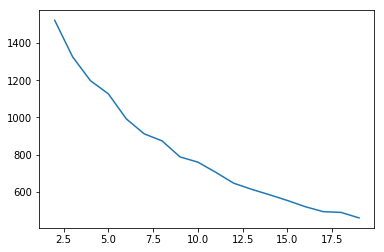

In [64]:
plt.plot(range(2,maxClusters),sse)

In [65]:
silh = []
for nClusters in range(2,maxClusters):
    kmeans = KMeans(n_clusters=nClusters, random_state=0).fit(dfNorm)
    silhouette_avg = silhouette_score(dfNorm, kmeans.labels_, sample_size = 10000)
    silh.append(silhouette_avg)

In [66]:
print(silh)

[0.2098204663916573, 0.17310484412426436, 0.15772472409612828, 0.11196133368066451, 0.1728581470706426, 0.1548879710873916, 0.11272543461283663, 0.10742570951658213, 0.12315862555496611, 0.11812754958842685, 0.10926020024683497, 0.13550672548239626, 0.11720103837471157, 0.11887485286566186, 0.10714875642385226, 0.10558533822781117, 0.10976983381631218, 0.11105838519692134]


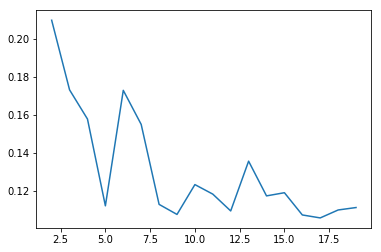

In [67]:
plt.plot(range(2,maxClusters),silh)

For n_clusters = 5 The average silhouette_score is : 0.11196133368066455
For n_clusters = 8 The average silhouette_score is : 0.11272543461283661
For n_clusters = 9 The average silhouette_score is : 0.10742570951658212


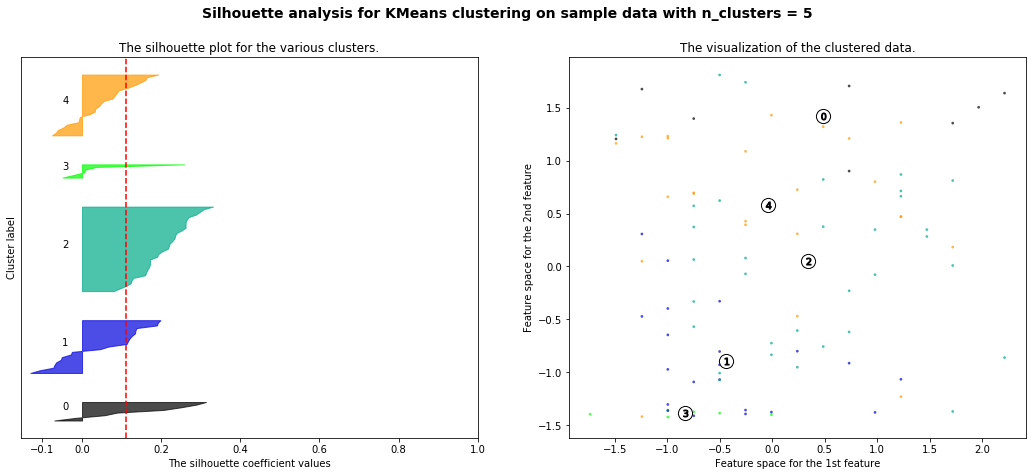

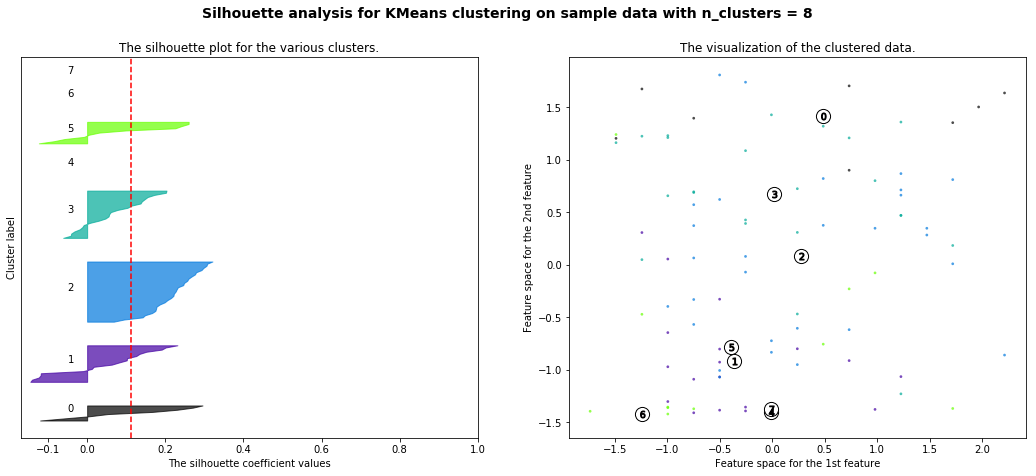

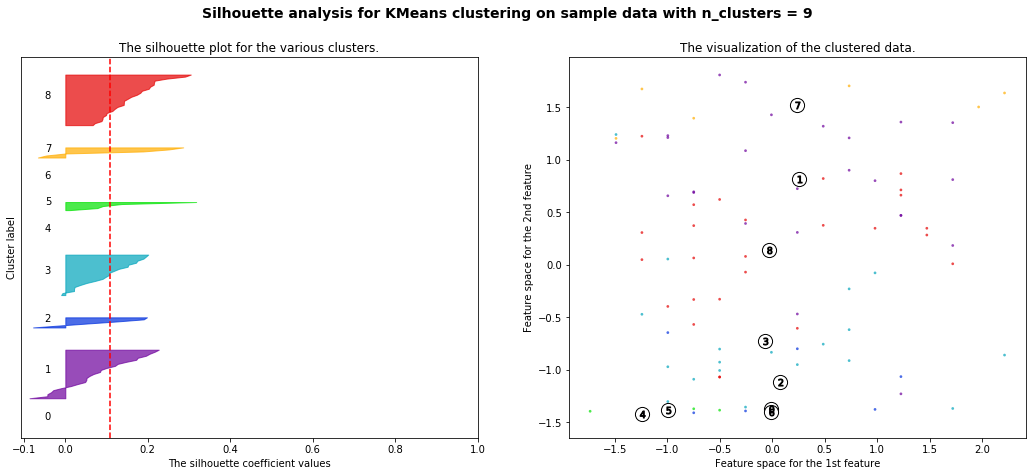

In [68]:
range_n_clusters = [5,8,9]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    #ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    #ax1.set_ylim([0, len(dfNorm) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels = kmeans.fit_predict(dfNorm)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(dfNorm, kmeans.labels_, sample_size = 10000)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(dfNorm, kmeans.labels_)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[kmeans.labels_ == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(dfNorm[:, 0], dfNorm[:, 1], marker='.', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k')

    # Labeling the clusters
    centers = kmeans.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

## K-Means Clustering

In [69]:
labels = KMeans(n_clusters=5, random_state=0).fit_predict(dfNorm)

In [70]:
pg_clust['Clusters'] = labels

In [71]:
pg['Clusters'] = labels

In [72]:
pg_clust['Clusters'].value_counts()

2    33
4    24
1    21
0     8
3     6
Name: Clusters, dtype: int64

In [73]:
pg_clust.groupby('Clusters').mean()

,Age,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
Clusters,,,,,,,,,,,,,,,,,,,,,
0,28.000000,1947.375000,23.050000,0.594375,0.397500,0.374875,2.700000,15.575000,9.262500,37.312500,...,14.500000,28.587500,5.387500,2.162500,7.562500,0.185750,5.037500,0.512500,5.550000,3.737500
1,24.238095,370.476190,8.442857,0.439381,0.379667,0.223905,2.961905,11.023810,6.933333,19.652381,...,16.000000,17.204762,-0.152381,0.276190,0.123810,-0.002000,-4.180952,-0.014286,-4.185714,-0.138095
2,27.424242,1012.242424,12.863636,0.540758,0.428485,0.208242,2.018182,9.006061,5.500000,23.542424,...,14.142424,19.366667,0.869697,0.642424,1.512121,0.071364,-0.657576,-0.875758,-1.536364,0.175758
3,22.666667,30.833333,-1.016667,0.325500,0.468833,0.081000,0.766667,3.500000,2.150000,9.383333,...,18.183333,17.400000,-0.083333,0.000000,-0.066667,-0.155167,-9.533333,-3.016667,-12.533333,-0.066667
4,25.875000,1375.166667,17.945833,0.558500,0.328875,0.243375,2.920833,13.091667,8.012500,30.362500,...,14.458333,23.429167,1.533333,1.500000,3.041667,0.124292,1.391667,0.504167,1.900000,1.054167


In [74]:
pg[pg.Clusters == 0]

,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,...,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,Clusters
19,Luka Dončić\doncilu01,PG,20,DAL,54,1799,27.7,0.584,0.442,0.442,...,37.0,5.8,2.3,8.1,0.215,7.3,1.1,8.4,4.7,0
37,LeBron James\jamesle01,PG,35,LAL,60,2094,26.0,0.582,0.324,0.292,...,31.6,6.1,3.4,9.5,0.218,6.8,1.9,8.7,5.7,0
43,Damian Lillard\lillada01,PG,29,POR,58,2140,26.2,0.619,0.493,0.377,...,30.2,8.9,0.7,9.6,0.215,7.9,-0.7,7.2,5.0,0
44,Kyle Lowry\lowryky01,PG,33,TOR,52,1901,17.9,0.589,0.583,0.399,...,23.1,4.1,2.8,6.9,0.173,2.5,0.7,3.2,2.5,0
62,Chris Paul\paulch01,PG,34,OKC,63,2003,21.7,0.609,0.347,0.311,...,23.2,5.5,2.5,8.1,0.194,3.1,1.2,4.3,3.2,0
75,Ben Simmons\simmobe01,PG,23,PHI,54,1930,20.8,0.608,0.010,0.460,...,20.9,3.8,3.2,7.0,0.174,1.4,2.4,3.9,2.9,0
85,Kemba Walker\walkeke02,PG,29,BOS,50,1592,20.2,0.569,0.526,0.270,...,27.8,3.5,1.9,5.4,0.163,5.0,-0.2,4.7,2.7,0
91,Trae Young\youngtr01,PG,21,ATL,60,2120,23.9,0.595,0.455,0.448,...,34.9,5.4,0.5,5.9,0.134,6.3,-2.3,4.0,3.2,0


In [75]:
pg[pg.Clusters == 1]

,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,...,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,Clusters
7,Ky Bowman\bowmaky01,PG,22,GSW,45,1015,9.2,0.494,0.333,0.128,...,17.2,-0.6,0.6,-0.1,-0.003,-4.0,-0.3,-4.3,-0.6,1
11,Jevon Carter\carteje01,PG,24,PHO,50,754,10.4,0.535,0.571,0.122,...,13.9,0.3,0.7,1.1,0.068,-1.6,1.0,-0.6,0.3,1
14,Chris Chiozza\chiozch01,PG,24,TOT,21,249,12.9,0.526,0.519,0.025,...,16.2,0.1,0.3,0.4,0.077,-0.8,1.6,0.8,0.2,1
20,PJ Dozier\doziepj01,PG,23,DEN,21,234,9.3,0.449,0.308,0.121,...,19.8,-0.1,0.2,0.1,0.019,-4.4,-0.8,-5.2,-0.2,1
25,Tim Frazier\fraziti01,PG,29,DET,27,355,9.8,0.464,0.319,0.255,...,17.3,-0.1,0.2,0.1,0.016,-2.9,-1.6,-4.5,-0.2,1
28,Brandon Goodwin\goodwbr01,PG,24,ATL,34,430,11.7,0.507,0.458,0.158,...,22.4,-0.1,0.2,0.1,0.013,-1.5,-1.3,-2.9,-0.1,1
35,Frank Jackson\jacksfr01,PG,21,NOP,51,656,7.7,0.500,0.467,0.249,...,20.4,-0.4,0.3,-0.1,-0.005,-4.0,-2.0,-6.0,-0.7,1
38,Ty Jerome\jeromty01,PG,22,PHO,28,315,8.1,0.437,0.443,0.132,...,17.6,-0.3,0.3,0.0,-0.002,-3.9,0.0,-3.8,-0.1,1
45,Josh Magette\magetjo01,PG,30,ORL,8,38,5.1,0.378,0.267,0.133,...,23.8,-0.2,0.1,-0.1,-0.126,-8.0,1.6,-6.4,0.0,1
46,Jeremiah Martin\martije02,PG,23,BRK,3,16,5.9,0.200,0.200,0.000,...,13.1,0.0,0.0,0.0,-0.040,-6.6,3.6,-3.0,0.0,1


In [76]:
pg[pg.Clusters == 2]

,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,...,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,Clusters
0,Ryan Arcidiacono\arcidry01,PG,25,CHI,58,930,9.0,0.551,0.627,0.173,...,12.5,0.7,0.7,1.4,0.070,-2.7,-0.1,-2.8,-0.2,2
1,D.J. Augustin\augusdj01,PG,32,ORL,49,1215,14.2,0.548,0.438,0.395,...,19.1,1.8,0.8,2.6,0.101,-0.3,-1.0,-1.4,0.2,2
3,J.J. Barea\bareajo01,PG,35,DAL,26,391,14.9,0.519,0.425,0.101,...,24.3,0.5,0.2,0.7,0.084,1.8,-2.7,-1.0,0.1,2
9,Jalen Brunson\brunsja01,PG,23,DAL,57,1022,15.0,0.553,0.309,0.193,...,20.4,1.6,0.7,2.3,0.108,0.1,-0.9,-0.8,0.3,2
10,Trey Burke\burketr01,PG,27,PHI,25,329,15.4,0.545,0.299,0.142,...,19.3,0.6,0.2,0.9,0.129,0.7,-1.1,-0.5,0.1,2
12,Alex Caruso\carusal01,PG,25,LAL,58,1032,11.0,0.538,0.412,0.292,...,13.9,0.6,1.6,2.2,0.103,-2.4,2.4,0.1,0.5,2
15,Mike Conley\conlemi01,PG,32,UTA,41,1171,13.7,0.527,0.438,0.241,...,23.0,1.0,1.0,2.1,0.085,0.4,-0.4,0.0,0.6,2
16,Quinn Cook\cookqu01,PG,26,LAL,38,409,10.5,0.517,0.382,0.052,...,20.8,-0.1,0.4,0.4,0.043,-2.3,-1.0,-3.3,-0.1,2
18,Matthew Dellavedova\dellama01,PG,29,CLE,57,821,8.1,0.463,0.520,0.211,...,13.0,0.1,0.1,0.2,0.010,-3.6,-1.6,-5.2,-0.7,2
21,Goran Dragić\dragigo01,PG,33,MIA,54,1531,15.9,0.571,0.472,0.333,...,25.7,2.0,1.1,3.0,0.095,1.4,-1.9,-0.5,0.6,2


In [77]:
pg[pg.Clusters == 3]

,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,...,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,Clusters
6,Jordan Bone\bonejo01,PG,22,DET,10,53,0.8,0.300,0.500,0.000,...,18.1,-0.1,0.0,-0.1,-0.118,-9.0,-2.9,-11.9,-0.1,3
13,Joe Chealey\chealjo01,PG,24,CHO,4,33,-2.8,0.127,0.571,0.286,...,13.2,-0.2,0.0,-0.1,-0.189,-14.3,1.7,-12.6,-0.1,3
30,Josh Gray\grayjo01,PG,26,NOP,2,23,-5.0,0.500,0.000,0.000,...,12.4,-0.1,0.0,-0.1,-0.224,-11.3,-4.7,-16.0,-0.1,3
31,Jared Harper\harpeja01,PG,22,PHO,3,8,-5.3,0.250,0.500,0.000,...,21.3,0.0,0.0,0.0,-0.253,-10.2,-5.7,-15.8,0.0,3
42,Jalen Lecque\lecquja01,PG,19,PHO,4,26,5.0,0.460,0.400,0.200,...,19.4,0.0,0.0,0.0,-0.042,-5.7,-3.6,-9.3,0.0,3
84,Gabe Vincent\vincega01,PG,23,MIA,6,42,1.2,0.316,0.842,0.000,...,20.0,-0.1,0.0,-0.1,-0.105,-6.7,-2.9,-9.6,-0.1,3


In [78]:
pg[pg.Clusters == 4]

,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,...,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,Clusters
2,Lonzo Ball\balllo01,PG,22,NOP,56,1817,13.7,0.529,0.578,0.107,...,18.6,0.7,1.9,2.6,0.068,0.4,0.6,1.0,1.3,4
4,Patrick Beverley\beverpa01,PG,31,LAC,48,1299,12.3,0.554,0.609,0.126,...,13.0,1.4,2.0,3.4,0.126,-0.5,2.6,2.1,1.3,4
5,Eric Bledsoe\bledser01,PG,30,MIL,56,1524,18.1,0.579,0.304,0.292,...,24.0,2.4,2.9,5.3,0.168,1.1,1.1,2.2,1.6,4
8,Malcolm Brogdon\brogdma01,PG,27,IND,48,1472,17.8,0.537,0.296,0.246,...,25.2,2.0,1.4,3.5,0.113,2.2,-0.5,1.7,1.4,4
17,Stephen Curry\curryst01,PG,31,GSW,5,139,21.7,0.557,0.598,0.317,...,33.6,0.2,0.1,0.3,0.104,4.5,-0.6,3.9,0.2,4
22,Kris Dunn\dunnkr01,PG,25,CHI,51,1269,12.1,0.510,0.327,0.158,...,14.6,0.3,2.0,2.3,0.085,-3.7,3.1,-0.6,0.4,4
24,De'Aaron Fox\foxde01,PG,22,SAC,45,1426,20.3,0.556,0.221,0.442,...,29.6,2.1,1.3,3.5,0.117,2.1,-0.3,1.8,1.4,4
26,Markelle Fultz\fultzma01,PG,21,ORL,64,1813,14.4,0.523,0.175,0.209,...,20.7,0.8,1.9,2.7,0.071,-1.9,0.2,-1.7,0.1,4
32,George Hill\hillge01,PG,33,MIL,52,1103,17.5,0.668,0.452,0.247,...,15.8,3.2,1.9,5.1,0.220,1.8,1.4,3.2,1.5,4
34,Kyrie Irving\irvinky01,PG,27,BRK,20,658,26.3,0.595,0.341,0.245,...,32.6,2.1,0.8,3.0,0.216,6.6,1.0,7.6,1.6,4


## Shooting Guard

In [79]:
sg.head()

,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,Nickeil Alexander-Walker\alexani01,SG,21,NOP,41,501,7.6,0.441,0.515,0.123,...,14.3,22.8,-0.7,0.4,-0.4,-0.034,-3.5,-1.4,-4.9,-0.4
1,Grayson Allen\allengr01,SG,24,MEM,30,498,11.4,0.577,0.517,0.199,...,10.7,17.9,0.5,0.3,0.7,0.070,-1.0,-1.5,-2.6,-0.1
2,Kadeem Allen\allenka01,SG,27,NYK,10,117,14.0,0.512,0.364,0.250,...,14.1,20.6,0.1,0.1,0.1,0.053,0.0,-0.6,-0.6,0.0
3,Dwayne Bacon\bacondw01,SG,24,CHO,39,687,6.1,0.419,0.275,0.217,...,12.2,19.5,-1.2,0.4,-0.8,-0.053,-5.9,-0.9,-6.8,-0.8
4,RJ Barrett\barrerj01,SG,19,NYK,56,1704,10.7,0.479,0.271,0.349,...,12.9,24.0,-1.6,1.1,-0.5,-0.015,-2.8,-1.5,-4.3,-1.0


In [80]:
sg_clust=sg.drop(['Player','Pos','Tm','G'], axis=1)

In [81]:
sg_clust.describe()

,Age,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
count,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,...,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000
mean,24.933333,890.096296,10.305926,0.500341,0.485933,0.206326,2.462222,10.942963,6.711111,12.170370,...,11.151852,19.180000,0.688889,0.734074,1.423704,0.033030,-2.152593,-0.669630,-2.820741,0.279259
std,3.661416,709.270572,7.627051,0.126511,0.169750,0.145703,2.160806,5.059077,2.752086,7.623051,...,5.442287,6.197289,1.351984,0.737904,1.855215,0.136294,4.146529,2.282094,5.660983,0.889499
min,19.000000,1.000000,-40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,8.400000,-1.600000,0.000000,-1.200000,-1.036000,-24.400000,-15.100000,-39.500000,-1.500000
25%,22.000000,192.000000,7.950000,0.472000,0.360000,0.119000,1.300000,8.400000,5.200000,7.300000,...,8.700000,15.150000,-0.100000,0.100000,0.000000,0.009500,-3.550000,-1.350000,-4.200000,-0.100000
50%,24.000000,779.000000,11.100000,0.527000,0.485000,0.192000,2.100000,10.900000,6.500000,10.800000,...,11.100000,18.200000,0.200000,0.400000,0.700000,0.054000,-1.500000,-0.700000,-2.000000,0.000000
75%,27.000000,1514.500000,14.150000,0.563500,0.582000,0.259000,3.100000,13.800000,8.150000,16.500000,...,13.150000,22.600000,1.200000,1.150000,2.450000,0.099500,0.150000,0.400000,0.400000,0.450000
max,36.000000,2241.000000,30.700000,0.727000,1.000000,1.000000,17.500000,33.100000,16.600000,44.900000,...,40.000000,42.800000,8.700000,3.100000,11.500000,0.317000,7.900000,7.200000,9.000000,6.300000


In [82]:
scaler = preprocessing.StandardScaler().fit(sg_clust)
dfNorm = scaler.transform(sg_clust)

/Users/charlesmarshall/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/charlesmarshall/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


In [83]:
maxClusters = 20
sse = []
for nClusters in range(2,maxClusters):
    kmeans = KMeans(n_clusters=nClusters, random_state=0).fit(dfNorm)
    sse.append(kmeans.inertia_)

In [84]:
print(sse)

[2417.89169665991, 2046.7028080908121, 1890.1982707367213, 1753.745620202555, 1621.5672096296175, 1499.450653183109, 1394.3833060511697, 1342.1474005133045, 1272.119178953514, 1180.4449317404988, 1121.1771885206947, 1069.6960100443955, 1027.2326032184124, 986.9143714392596, 954.5473667335909, 891.9092257910272, 866.6793382984577, 841.0494621847587]


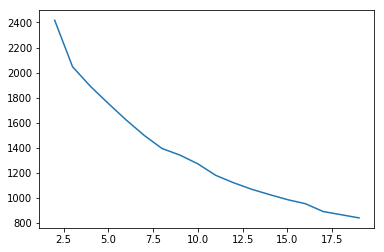

In [85]:
plt.plot(range(2,maxClusters),sse)

In [86]:
silh = []
for nClusters in range(2,maxClusters):
    kmeans = KMeans(n_clusters=nClusters, random_state=0).fit(dfNorm)
    silhouette_avg = silhouette_score(dfNorm, kmeans.labels_, sample_size = 10000)
    silh.append(silhouette_avg)

In [87]:
print(silh)

[0.17595535253237873, 0.19967347402976338, 0.13256364676972945, 0.15234827373005908, 0.13250220517035494, 0.12166176813130523, 0.12661822668060294, 0.11301931444168913, 0.12745547418773, 0.11426782962437564, 0.11420870325923183, 0.11623522506791227, 0.10427877815862867, 0.0940335324264866, 0.08831524026663763, 0.11415473491559062, 0.1036758424510851, 0.09789095359289655]


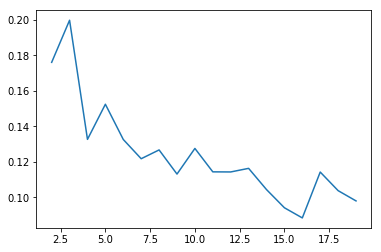

In [88]:
plt.plot(range(2,maxClusters),silh)

For n_clusters = 4 The average silhouette_score is : 0.13256364676972948
For n_clusters = 6 The average silhouette_score is : 0.13250220517035494
For n_clusters = 9 The average silhouette_score is : 0.11301931444168913
For n_clusters = 10 The average silhouette_score is : 0.12745547418773


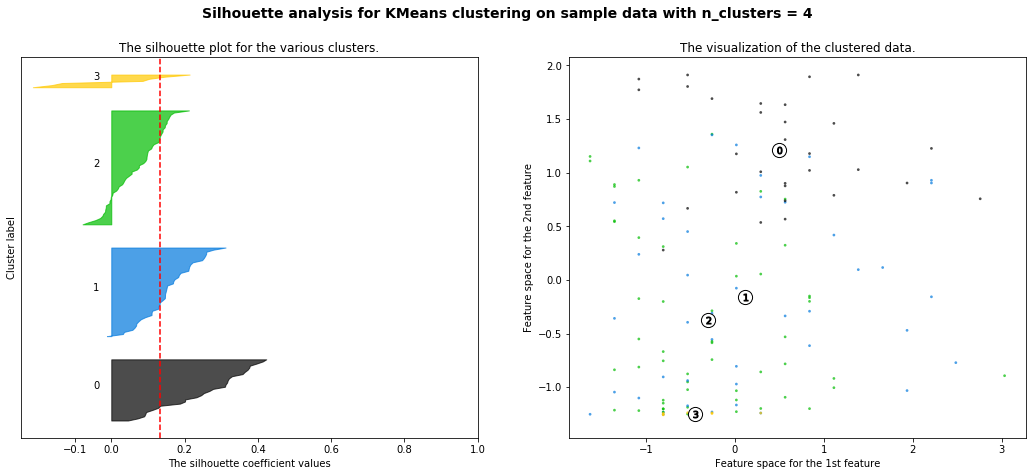

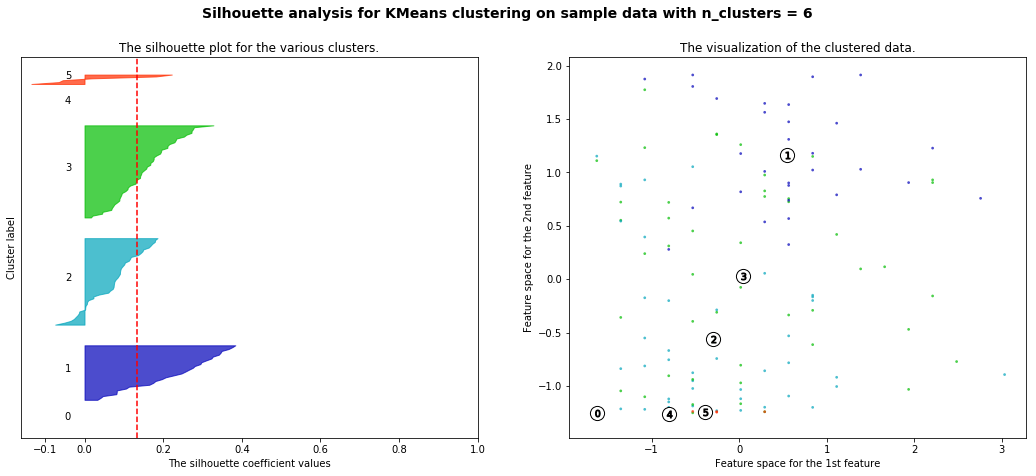

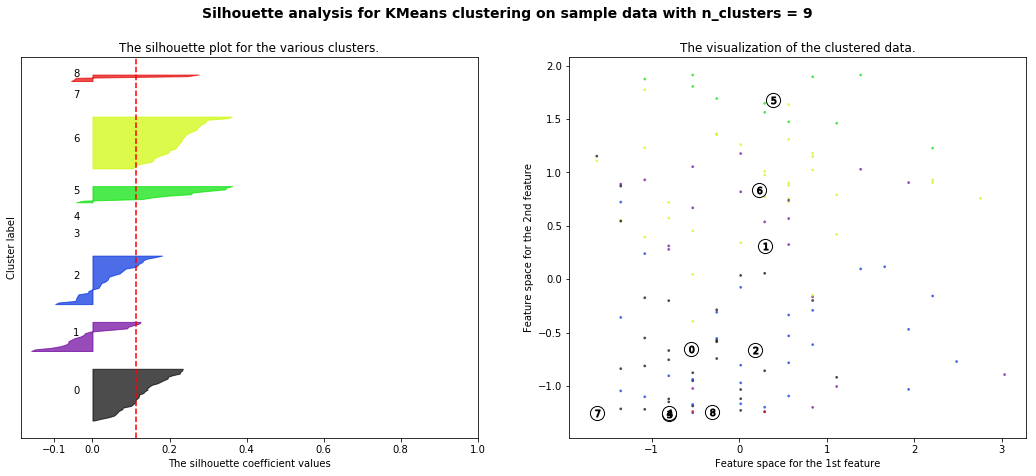

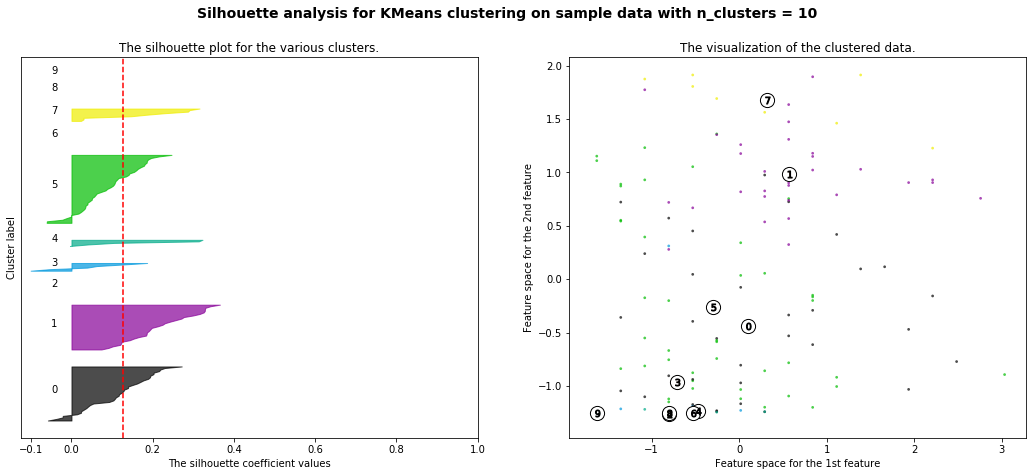

In [89]:
range_n_clusters = [4,6,9,10]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    #ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    #ax1.set_ylim([0, len(dfNorm) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels = kmeans.fit_predict(dfNorm)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(dfNorm, kmeans.labels_, sample_size = 10000)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(dfNorm, kmeans.labels_)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[kmeans.labels_ == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(dfNorm[:, 0], dfNorm[:, 1], marker='.', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k')

    # Labeling the clusters
    centers = kmeans.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

## K-Means Clustering

In [90]:
labels = KMeans(n_clusters=4, random_state=0).fit_predict(dfNorm)

In [91]:
sg_clust['Clusters'] = labels

In [92]:
sg['Clusters'] = labels

In [93]:
sg_clust['Clusters'].value_counts()

2    55
1    43
0    30
3     7
Name: Clusters, dtype: int64

In [94]:
sg_clust.groupby('Clusters').mean()

,Age,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
Clusters,,,,,,,,,,,,,,,,,,,,,
0,26.733333,1747.966667,16.603333,0.575700,0.455833,0.248667,2.436667,11.566667,7.010000,17.790000,...,11.066667,23.336667,2.566667,1.603333,4.176667,0.115367,1.550000,-0.153333,1.403333,1.540000
1,25.372093,774.976744,10.432558,0.528116,0.598326,0.183791,1.816279,8.034884,4.927907,9.934884,...,8.127907,16.904651,0.527907,0.504651,1.034884,0.059442,-1.658140,-0.716279,-2.376744,-0.013953
2,23.818182,624.218182,9.612727,0.480345,0.410873,0.208927,3.294545,12.894545,8.100000,11.680000,...,12.512727,18.176364,-0.114545,0.532727,0.412727,0.021909,-3.172727,-0.096364,-3.263636,-0.140000
3,23.285714,9.714286,-12.014286,0.163857,0.514286,0.142857,0.000000,10.800000,5.471429,5.671429,...,19.400000,23.228571,-0.057143,0.000000,-0.042857,-0.394714,-13.042857,-7.100000,-20.171429,-0.028571


In [95]:
sg[sg.Clusters == 0]

,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,...,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,Clusters
5,Bradley Beal\bealbr01,SG,26,WAS,57,2053,23.1,0.579,0.369,0.351,...,34.4,4.6,0.5,5.1,0.119,5.3,-2.4,2.9,2.5,0
9,Bogdan Bogdanović\bogdabo01,SG,27,SAC,53,1510,14.3,0.560,0.595,0.164,...,22.3,1.2,1.1,2.4,0.075,0.7,-0.3,0.4,0.9,0
10,Devin Booker\bookede01,SG,23,PHO,62,2241,19.8,0.617,0.313,0.395,...,29.5,4.8,1.2,6.0,0.129,3.1,-1.4,1.7,2.1,0
19,Alec Burks\burksal01,SG,28,TOT,59,1612,16.0,0.549,0.389,0.358,...,23.8,1.9,1.1,2.9,0.088,0.6,-0.7,-0.2,0.7,0
21,Kentavious Caldwell-Pope\caldwke01,SG,26,LAL,63,1603,11.6,0.592,0.474,0.204,...,14.8,2.0,1.8,3.8,0.114,-0.8,0.5,-0.3,0.7,0
23,Jordan Clarkson\clarkjo01,SG,27,TOT,63,1527,17.9,0.583,0.469,0.193,...,25.5,2.6,0.9,3.5,0.110,2.7,-1.1,1.6,1.4,0
30,Seth Curry\curryse01,SG,29,DAL,59,1448,16.2,0.650,0.564,0.165,...,18.6,3.4,0.9,4.3,0.144,2.0,-0.7,1.4,1.2,0
32,Terence Davis\daviste02,SG,22,TOR,64,1087,14.5,0.598,0.568,0.133,...,18.9,1.4,1.6,3.0,0.133,0.7,0.6,1.3,0.9,0
33,Spencer Dinwiddie\dinwisp01,SG,26,BRK,64,1994,17.9,0.541,0.392,0.437,...,29.2,3.4,1.7,5.1,0.123,2.6,-0.8,1.7,1.9,0
34,Donte DiVincenzo\divindo01,SG,23,MIL,59,1362,15.0,0.570,0.489,0.173,...,16.9,1.4,3.1,4.5,0.158,-0.6,2.7,2.1,1.4,0


In [96]:
sg[sg.Clusters == 1]

,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,...,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,Clusters
1,Grayson Allen\allengr01,SG,24,MEM,30,498,11.4,0.577,0.517,0.199,...,17.9,0.5,0.3,0.7,0.070,-1.0,-1.5,-2.6,-0.1,1
6,Malik Beasley\beaslma01,SG,23,TOT,55,1209,12.7,0.546,0.517,0.124,...,21.8,0.4,0.9,1.3,0.053,-0.7,-1.3,-2.0,0.0,1
7,Marco Belinelli\belinma01,SG,33,SAS,52,779,10.2,0.521,0.572,0.151,...,17.0,0.4,0.1,0.6,0.035,-1.0,-1.9,-2.9,-0.2,1
12,Avery Bradley\bradlav01,SG,29,LAL,49,1186,8.9,0.537,0.452,0.063,...,15.7,0.2,1.4,1.6,0.066,-2.9,0.5,-2.4,-0.1,1
18,Reggie Bullock\bullore01,SG,28,NYK,29,684,9.3,0.502,0.496,0.094,...,15.6,0.2,0.3,0.5,0.036,-2.7,-0.3,-3.0,-0.2,1
24,Chris Clemons\clemoch01,SG,22,HOU,29,251,12.6,0.546,0.746,0.056,...,24.0,0.1,0.2,0.2,0.046,0.4,-1.7,-1.3,0.1,1
28,Allen Crabbe\crabbal01,SG,27,TOT,37,653,6.0,0.470,0.672,0.079,...,12.7,-0.2,0.1,-0.1,-0.007,-3.7,-1.5,-5.3,-0.5,1
31,Troy Daniels\danietr01,SG,28,TOT,42,457,8.9,0.524,0.711,0.101,...,16.2,0.2,0.4,0.7,0.070,-1.2,-1.0,-2.2,0.0,1
35,Luguentz Dort\dortlu01,SG,20,OKC,29,637,7.3,0.521,0.465,0.229,...,13.0,0.2,0.5,0.7,0.052,-4.3,0.4,-3.9,-0.3,1
36,Damyean Dotson\dotsoda01,SG,25,NYK,48,836,10.9,0.527,0.562,0.114,...,16.5,0.6,0.3,0.9,0.053,-0.9,-0.5,-1.4,0.1,1


In [97]:
sg[sg.Clusters == 2]

,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,...,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,Clusters
0,Nickeil Alexander-Walker\alexani01,SG,21,NOP,41,501,7.6,0.441,0.515,0.123,...,22.8,-0.7,0.4,-0.4,-0.034,-3.5,-1.4,-4.9,-0.4,2
2,Kadeem Allen\allenka01,SG,27,NYK,10,117,14.0,0.512,0.364,0.250,...,20.6,0.1,0.1,0.1,0.053,0.0,-0.6,-0.6,0.0,2
3,Dwayne Bacon\bacondw01,SG,24,CHO,39,687,6.1,0.419,0.275,0.217,...,19.5,-1.2,0.4,-0.8,-0.053,-5.9,-0.9,-6.8,-0.8,2
4,RJ Barrett\barrerj01,SG,19,NYK,56,1704,10.7,0.479,0.271,0.349,...,24.0,-1.6,1.1,-0.5,-0.015,-2.8,-1.5,-4.3,-1.0,2
8,DeAndre' Bembry\bembrde01,SG,25,ATL,43,915,9.6,0.500,0.285,0.211,...,14.0,-0.5,0.7,0.2,0.011,-3.5,1.0,-2.4,-0.1,2
11,Brian Bowen\bowenbr02,SG,21,IND,5,29,-2.0,0.222,0.222,0.000,...,15.2,-0.1,0.0,-0.1,-0.154,-9.7,-2.1,-11.8,-0.1,2
13,Ryan Broekhoff\broekry01,SG,29,DAL,17,180,13.1,0.568,0.864,0.136,...,16.3,0.2,0.2,0.4,0.116,0.4,0.4,0.9,0.1,2
14,Dillon Brooks\brookdi01,SG,24,MEM,65,1851,11.1,0.508,0.387,0.192,...,25.0,-0.3,1.3,1.0,0.025,-2.8,-1.5,-4.3,-1.1,2
15,Bruce Brown\brownbr01,SG,23,DET,58,1634,11.9,0.518,0.215,0.266,...,16.0,0.8,1.4,2.1,0.062,-2.0,0.8,-1.2,0.3,2
16,Charlie Brown\brownch02,SG,22,ATL,10,40,11.1,0.472,0.474,0.263,...,25.1,0.0,0.0,0.0,-0.028,-1.1,-1.4,-2.5,0.0,2


In [98]:
sg[sg.Clusters == 3]

,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,...,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,Clusters
62,William Howard\howarwi01,SG,26,HOU,2,13,-12.7,0.000,1.000,0.0,...,15.9,-0.1,0.0,-0.1,-0.354,-14.9,-5.7,-20.7,-0.1,3
79,Daryl Macon\maconda01,SG,24,MIA,4,14,-3.1,0.500,0.667,0.0,...,15.8,0.0,0.0,0.0,-0.161,-7.0,-4.4,-11.4,0.0,3
96,Malik Newman\newmama01,SG,22,CLE,1,4,-11.3,0.347,0.500,1.0,...,41.5,0.0,0.0,0.0,-0.503,-14.5,-11.3,-25.9,0.0,3
102,Miye Oni\onimi01,SG,22,UTA,5,11,-9.9,0.000,0.500,0.0,...,12.0,-0.1,0.0,-0.1,-0.285,-12.7,-4.6,-17.3,0.0,3
106,Josh Reaves\reavejo02,SG,22,DAL,2,1,-40.0,0.000,0.000,0.0,...,42.8,0.0,0.0,0.0,-1.036,-24.4,-15.1,-39.5,0.0,3
114,Marial Shayok\shayoma01,SG,24,PHI,2,10,-2.0,0.300,0.600,0.0,...,25.9,-0.1,0.0,0.0,-0.227,-8.7,-2.6,-11.3,0.0,3
130,Quinndary Weatherspoon\weathqu01,SG,23,SAS,3,15,-5.1,0.000,0.333,0.0,...,8.7,-0.1,0.0,-0.1,-0.197,-9.1,-6.0,-15.1,-0.1,3


## Small Forward

In [99]:
sf.head()

,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,Justin Anderson\anderju01,SF,26,BRK,3,17,-3.8,0.218,0.500,0.333,...,0.0,16.9,-0.1,0.0,-0.1,-0.167,-12.8,-2.3,-15.1,-0.1
1,Thanasis Antetokounmpo\antetth01,SF,27,MIL,18,93,14.2,0.528,0.194,0.417,...,20.5,23.8,0.0,0.2,0.2,0.083,-4.0,1.7,-2.3,0.0
2,OG Anunoby\anunoog01,SF,22,TOR,63,1897,13.2,0.598,0.408,0.163,...,11.7,14.4,1.8,3.3,5.1,0.130,-0.9,1.8,0.9,1.4
3,Trevor Ariza\arizatr01,SF,34,TOT,53,1493,11.0,0.593,0.639,0.228,...,13.6,11.9,1.3,1.3,2.6,0.084,-1.5,0.9,-0.5,0.6
4,Will Barton\bartowi01,SF,29,DEN,58,1916,15.7,0.549,0.390,0.180,...,9.9,20.0,2.4,2.1,4.5,0.113,1.2,-0.1,1.2,1.5


In [100]:
sf_clust=sf.drop(['Player','Pos','Tm','G'], axis=1)

In [101]:
sf_clust.describe()

,Age,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
count,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,...,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000
mean,25.451613,905.236559,10.418280,0.509602,0.424344,0.234656,3.933333,14.219355,9.086022,9.895699,...,12.743011,17.013978,0.737634,0.887097,1.631183,0.048957,-2.555914,-0.079570,-2.625806,0.294624
std,4.259302,702.854667,6.544795,0.130316,0.187822,0.132220,2.879588,3.777630,2.502850,5.728493,...,7.615779,4.827696,1.354374,0.815905,1.980831,0.103611,3.733906,1.581177,4.756344,0.868327
min,19.000000,9.000000,-16.600000,0.000000,0.000000,0.000000,0.000000,0.000000,3.500000,0.000000,...,0.000000,7.700000,-1.700000,0.000000,-0.400000,-0.456000,-17.000000,-8.200000,-25.200000,-1.400000
25%,22.000000,272.000000,8.400000,0.497000,0.333000,0.154000,2.200000,12.300000,7.500000,6.800000,...,9.300000,13.900000,-0.100000,0.200000,0.100000,0.020000,-3.600000,-1.000000,-4.300000,-0.100000
50%,25.000000,810.000000,11.000000,0.536000,0.415000,0.227000,3.300000,14.300000,9.200000,8.000000,...,11.700000,16.700000,0.200000,0.700000,0.800000,0.072000,-2.400000,0.100000,-1.900000,0.000000
75%,28.000000,1641.000000,13.400000,0.583000,0.524000,0.296000,4.800000,16.800000,10.400000,11.800000,...,14.300000,19.400000,1.300000,1.500000,2.700000,0.108000,-0.600000,0.900000,-0.300000,0.600000
max,43.000000,2091.000000,26.700000,0.678000,0.886000,0.679000,14.400000,22.300000,18.400000,28.100000,...,50.000000,33.200000,6.000000,3.300000,8.500000,0.222000,6.500000,4.000000,9.000000,4.600000


In [102]:
scaler = preprocessing.StandardScaler().fit(sf_clust)
dfNorm = scaler.transform(sf_clust)

/Users/charlesmarshall/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/charlesmarshall/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


In [103]:
maxClusters = 20
sse = []
for nClusters in range(2,maxClusters):
    kmeans = KMeans(n_clusters=nClusters, random_state=0).fit(dfNorm)
    sse.append(kmeans.inertia_)

In [104]:
print(sse)

[1610.3573389243434, 1331.5170981812876, 1181.4879104811448, 1067.3722612997217, 968.8266545729599, 925.8222724712612, 846.947776932943, 810.5520701299218, 780.1284867839554, 719.7033292398498, 696.6033699848824, 673.4048121043445, 643.292149659907, 609.1016487188929, 596.9739741596612, 556.021989599165, 551.0322598972855, 527.8221882549997]


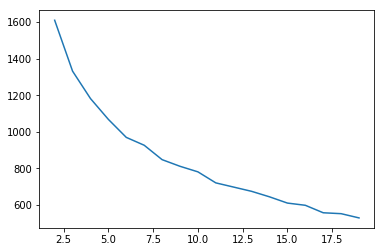

In [105]:
plt.plot(range(2,maxClusters),sse)

In [106]:
silh = []
for nClusters in range(2,maxClusters):
    kmeans = KMeans(n_clusters=nClusters, random_state=0).fit(dfNorm)
    silhouette_avg = silhouette_score(dfNorm, kmeans.labels_, sample_size = 10000)
    silh.append(silhouette_avg)

In [107]:
print(silh)

[0.1955123519382107, 0.22745731390018914, 0.1487095525500345, 0.14850998461056822, 0.16848836848571408, 0.12931452947320685, 0.15067121131292052, 0.12558499169016452, 0.11628070355082691, 0.1269567053994065, 0.11459033841995166, 0.12648584923834832, 0.12339849285299345, 0.13313702097718236, 0.11664910964343277, 0.12773716321931802, 0.11365840047230631, 0.11374472123784839]


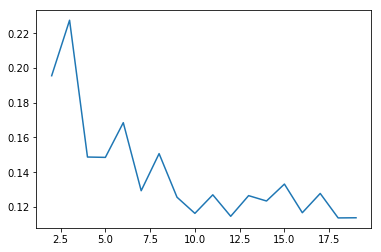

In [108]:
plt.plot(range(2,maxClusters),silh)

For n_clusters = 4 The average silhouette_score is : 0.1487095525500345
For n_clusters = 6 The average silhouette_score is : 0.16848836848571408
For n_clusters = 9 The average silhouette_score is : 0.1255849916901645


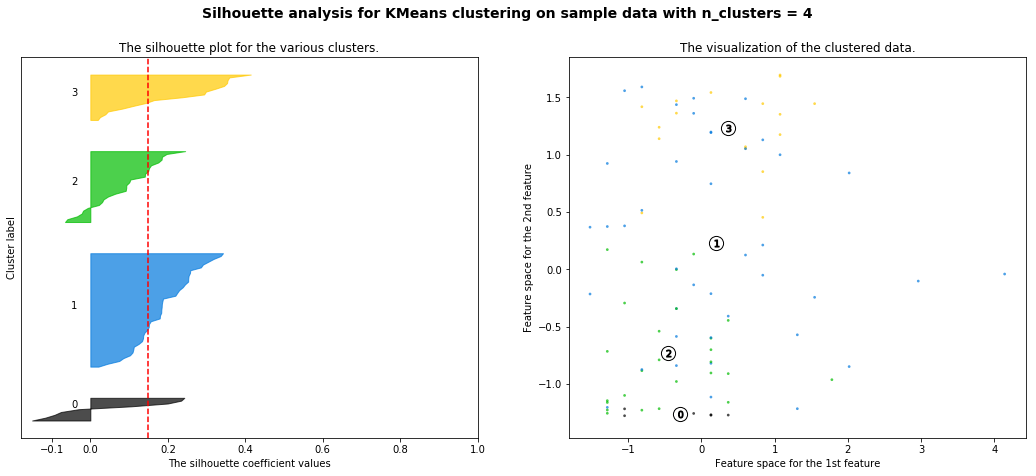

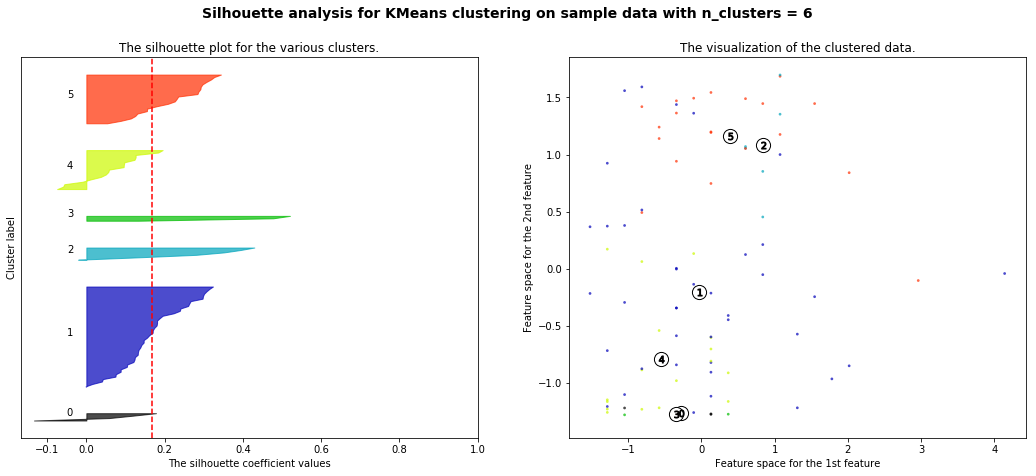

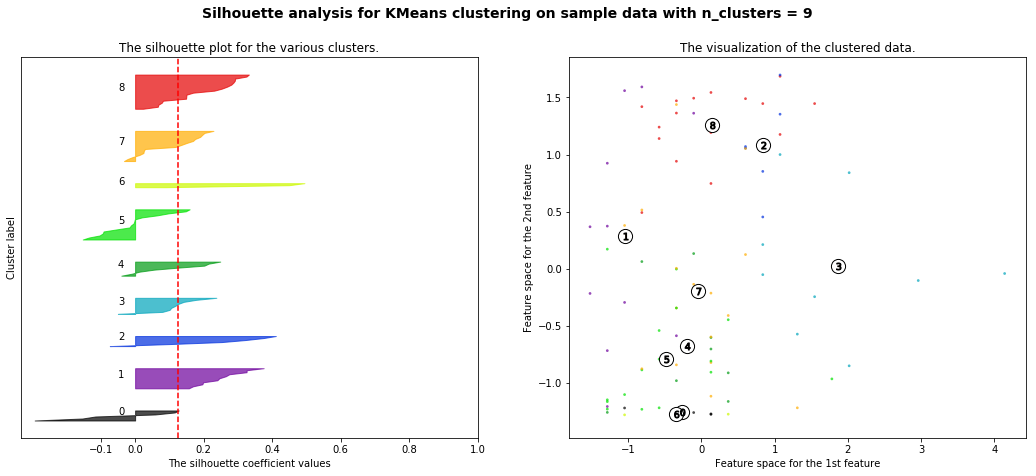

In [109]:
range_n_clusters = [4,6,9]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    #ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    #ax1.set_ylim([0, len(dfNorm) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels = kmeans.fit_predict(dfNorm)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(dfNorm, kmeans.labels_, sample_size = 10000)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(dfNorm, kmeans.labels_)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[kmeans.labels_ == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(dfNorm[:, 0], dfNorm[:, 1], marker='.', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k')

    # Labeling the clusters
    centers = kmeans.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

## K-Means Clustering

In [110]:
labels = KMeans(n_clusters=6, random_state=0).fit_predict(dfNorm)

In [111]:
sf_clust['Clusters'] = labels

In [112]:
sf['Clusters'] = labels

In [113]:
sf_clust['Clusters'].value_counts()

1    42
5    21
4    17
2     6
0     4
3     3
Name: Clusters, dtype: int64

In [114]:
sf_clust.groupby('Clusters').mean()

,Age,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
Clusters,,,,,,,,,,,,,,,,,,,,,
0,24.250000,23.250000,-4.300000,0.205750,0.453250,0.378250,2.875000,7.600000,5.200000,2.650000,...,1.900000,19.975000,-0.100000,0.000000,-0.075000,-0.224750,-11.450000,-4.225000,-15.675000,-0.075000
1,25.285714,762.857143,8.807143,0.496095,0.498429,0.198929,3.171429,13.778571,8.447619,9.559524,...,12.169048,15.773810,-0.021429,0.592857,0.585714,0.029119,-3.197619,-0.188095,-3.380952,-0.204762
2,29.000000,1660.166667,21.916667,0.593167,0.276500,0.355500,3.183333,17.216667,10.400000,23.716667,...,11.333333,26.950000,4.166667,2.266667,6.433333,0.185167,3.666667,0.933333,4.600000,2.733333
3,24.000000,19.000000,-7.100000,0.133333,0.177667,0.000000,1.133333,19.200000,10.433333,5.300000,...,42.500000,11.033333,-0.100000,0.000000,-0.066667,-0.199333,-12.600000,-1.566667,-14.200000,-0.066667
4,23.117647,351.176471,13.235294,0.557235,0.229765,0.319706,7.782353,15.829412,11.776471,8.341176,...,14.376471,16.429412,0.305882,0.494118,0.794118,0.093588,-2.235294,0.858824,-1.352941,0.129412
5,27.095238,1717.428571,13.380952,0.585810,0.505667,0.208905,3.157143,13.490476,8.357143,9.914286,...,10.785714,17.419048,1.904762,1.695238,3.595238,0.101190,-0.180952,0.090476,-0.071429,0.852381


In [115]:
sf[sf.Clusters == 0]

,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,...,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,Clusters
0,Justin Anderson\anderju01,SF,26,BRK,3,17,-3.8,0.218,0.500,0.333,...,16.9,-0.1,0.0,-0.1,-0.167,-12.8,-2.3,-15.1,-0.1,0
11,Ignas Brazdeikis\brazdig01,SF,21,NYK,9,53,3.3,0.351,0.409,0.227,...,21.0,-0.1,0.0,-0.1,-0.109,-5.0,-3.9,-8.9,-0.1,0
57,Vic Law\lawvi01,SF,24,ORL,5,9,-16.6,0.000,0.333,0.667,...,18.6,-0.1,0.0,-0.1,-0.456,-17.0,-8.2,-25.2,-0.1,0
85,Jarrod Uthoff\uthofja01,SF,26,MEM,4,14,-0.1,0.254,0.571,0.286,...,23.4,-0.1,0.0,0.0,-0.167,-11.0,-2.5,-13.5,0.0,0


In [116]:
sf[sf.Clusters == 1]

,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,...,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,Clusters
5,Keita Bates-Diop\bateske01,SF,24,TOT,39,665,12.6,0.541,0.452,0.332,...,15.6,0.6,0.5,1.1,0.081,-0.8,-0.1,-0.8,0.2,1
6,Nicolas Batum\batumni01,SF,31,CHO,22,505,9.2,0.463,0.605,0.123,...,9.4,0.2,0.4,0.6,0.055,-2.7,0.9,-1.9,0.0,1
7,Kent Bazemore\bazemke01,SF,30,TOT,64,1604,9.2,0.500,0.461,0.287,...,17.2,-0.8,1.5,0.7,0.020,-3.4,0.4,-3.0,-0.4,1
13,Miles Bridges\bridgmi02,SF,21,CHO,65,1995,12.1,0.520,0.398,0.174,...,20.0,0.3,1.3,1.6,0.038,-1.5,-1.0,-2.5,-0.3,1
14,Oshae Brissett\brissos01,SF,21,TOR,19,135,6.7,0.458,0.417,0.278,...,15.0,-0.1,0.2,0.1,0.042,-5.7,0.3,-5.4,-0.1,1
16,Sterling Brown\brownst02,SF,24,MIL,45,665,9.3,0.478,0.523,0.161,...,16.7,-0.4,1.3,1.0,0.071,-3.1,1.0,-2.0,0.0,1
20,DeMarre Carroll\carrode01,SF,33,TOT,21,231,8.5,0.523,0.500,0.667,...,15.8,0.0,0.1,0.1,0.026,-3.4,-1.1,-4.5,-0.1,1
21,Vince Carter\cartevi01,SF,43,ATL,60,876,7.6,0.470,0.664,0.095,...,16.6,-0.6,0.4,-0.2,-0.011,-3.1,-1.2,-4.3,-0.5,1
22,Wilson Chandler\chandwi01,SF,32,BRK,35,734,7.4,0.531,0.661,0.126,...,13.0,-0.1,0.9,0.8,0.050,-3.9,1.0,-2.9,-0.2,1
24,Torrey Craig\craigto01,SF,29,DEN,50,869,10.4,0.559,0.524,0.149,...,12.2,0.8,0.9,1.7,0.095,-2.4,0.1,-2.3,-0.1,1


In [117]:
sf[sf.Clusters == 2]

,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,...,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,Clusters
17,Jimmy Butler\butleji01,SF,30,MIA,54,1851,23.4,0.583,0.162,0.679,...,25.2,6.0,2.5,8.5,0.219,4.0,1.3,5.2,3.4,2
26,DeMar DeRozan\derozde01,SF,30,SAS,61,2091,21.3,0.597,0.031,0.419,...,26.6,5.1,1.1,6.2,0.143,2.1,-0.5,1.6,1.9,2
32,Paul George\georgpa01,SF,29,LAC,42,1222,20.5,0.582,0.494,0.277,...,29.6,1.9,2.0,3.9,0.153,3.4,1.1,4.5,2.0,2
38,Gordon Hayward\haywago01,SF,29,BOS,45,1501,18.2,0.593,0.311,0.183,...,20.9,3.1,1.9,5.0,0.160,2.6,0.3,2.9,1.8,2
58,Kawhi Leonard\leonaka01,SF,28,LAC,51,1643,26.7,0.585,0.287,0.344,...,33.2,4.6,3.0,7.6,0.222,6.5,2.5,9.0,4.6,2
64,Khris Middleton\middlkh01,SF,28,MIL,55,1653,21.4,0.619,0.374,0.231,...,26.2,4.3,3.1,7.4,0.214,3.4,0.9,4.4,2.7,2


In [118]:
sf[sf.Clusters == 3]

,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,...,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,Clusters
23,Zylan Cheatham\cheatzy01,SF,24,NOP,3,31,0.1,0.4,0.200,0.0,...,10.5,-0.1,0.0,-0.1,-0.080,-10.2,0.1,-10.2,-0.1,3
53,Stanton Kidd\kiddst01,SF,27,UTA,4,15,-13.7,0.0,0.333,0.0,...,14.6,-0.1,0.0,-0.1,-0.327,-15.6,-1.3,-16.9,-0.1,3
80,Isaiah Roby\robyis01,SF,21,OKC,3,11,-7.7,0.0,0.000,0.0,...,8.0,-0.1,0.0,0.0,-0.191,-12.0,-3.5,-15.5,0.0,3


In [119]:
sf[sf.Clusters == 4]

,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,...,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,Clusters
1,Thanasis Antetokounmpo\antetth01,SF,27,MIL,18,93,14.2,0.528,0.194,0.417,...,23.8,0.0,0.2,0.2,0.083,-4.0,1.7,-2.3,0.0,4
8,Dragan Bender\bendedr01,SF,22,TOT,16,286,11.0,0.545,0.467,0.152,...,17.7,0.0,0.3,0.3,0.053,-3.0,0.1,-2.9,-0.1,4
10,Isaac Bonga\bongais01,SF,20,WAS,58,1025,10.7,0.627,0.299,0.348,...,10.3,1.3,0.4,1.7,0.081,-2.4,0.0,-2.4,-0.1,4
18,Bruno Caboclo\cabocbr01,SF,24,TOT,27,220,13.4,0.455,0.364,0.065,...,16.7,0.0,0.4,0.3,0.070,-2.5,1.1,-1.4,0.0,4
19,Vlatko Čančar\cancavl01,SF,22,DEN,14,45,11.4,0.507,0.400,0.267,...,19.1,0.0,0.0,0.1,0.069,-3.5,-1.1,-4.5,0.0,4
33,Javonte Green\greenja02,SF,26,BOS,44,414,12.3,0.558,0.235,0.367,...,13.6,0.3,0.7,1.0,0.112,-2.4,1.8,-0.6,0.1,4
36,Shaquille Harrison\harrish01,SF,26,CHI,43,484,17.8,0.559,0.255,0.303,...,18.1,0.8,0.8,1.5,0.153,0.4,2.4,2.8,0.6,4
40,Jaylen Hoard\hoardja01,SF,20,POR,13,103,14.9,0.504,0.094,0.406,...,17.2,0.1,0.1,0.2,0.096,-0.9,-1.1,-1.9,0.0,4
41,Rondae Hollis-Jefferson\holliro01,SF,25,TOR,52,998,15.5,0.533,0.058,0.437,...,17.2,1.4,1.8,3.2,0.153,-1.1,1.5,0.5,0.6,4
45,Chandler Hutchison\hutchch01,SF,23,CHI,28,527,12.4,0.521,0.217,0.446,...,19.1,0.0,0.7,0.7,0.060,-2.7,0.1,-2.6,-0.1,4


In [120]:
sf[sf.Clusters == 5]

,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,...,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,Clusters
2,OG Anunoby\anunoog01,SF,22,TOR,63,1897,13.2,0.598,0.408,0.163,...,14.4,1.8,3.3,5.1,0.130,-0.9,1.8,0.9,1.4,5
3,Trevor Ariza\arizatr01,SF,34,TOT,53,1493,11.0,0.593,0.639,0.228,...,11.9,1.3,1.3,2.6,0.084,-1.5,0.9,-0.5,0.6,5
4,Will Barton\bartowi01,SF,29,DEN,58,1916,15.7,0.549,0.390,0.180,...,20.0,2.4,2.1,4.5,0.113,1.2,-0.1,1.2,1.5,5
9,Bojan Bogdanović\bogdabo02,SF,30,UTA,63,2083,15.7,0.603,0.489,0.296,...,25.6,2.7,1.6,4.3,0.099,1.6,-1.5,0.2,1.1,5
12,Mikal Bridges\bridgmi01,SF,23,PHO,65,1772,13.0,0.623,0.391,0.258,...,12.4,2.2,1.9,4.1,0.111,-0.7,1.5,0.8,1.3,5
15,Jaylen Brown\brownja02,SF,23,BOS,50,1702,17.1,0.589,0.364,0.280,...,24.7,2.1,2.3,4.5,0.126,1.0,-0.1,0.9,1.2,5
25,Jae Crowder\crowdja01,SF,29,TOT,58,1695,12.1,0.532,0.692,0.236,...,15.6,1.2,2.0,3.2,0.090,-0.9,0.3,-0.6,0.6,5
34,Maurice Harkless\harklma01,SF,26,TOT,62,1427,9.7,0.572,0.346,0.233,...,10.7,0.8,1.9,2.7,0.090,-2.6,1.9,-0.8,0.5,5
35,Joe Harris\harrijo01,SF,28,BRK,63,1946,12.7,0.592,0.523,0.118,...,17.9,2.1,1.7,3.8,0.094,0.0,-0.5,-0.5,0.8,5
37,Josh Hart\hartjo01,SF,24,NOP,57,1563,11.7,0.556,0.676,0.189,...,15.3,1.0,1.7,2.7,0.083,-1.2,0.6,-0.6,0.6,5


## Power Forward

In [121]:
pf.head()

,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,Bam Adebayo\adebaba01,PF,22,MIA,65,2235,20.6,0.606,0.018,0.476,...,17.5,20.8,4.6,3.6,8.1,0.175,1.6,2.1,3.6,3.2
1,Al-Farouq Aminu\aminual01,PF,29,ORL,18,380,7.6,0.395,0.419,0.337,...,14.7,13.2,-0.4,0.5,0.1,0.016,-4.5,1.4,-3.1,-0.1
2,Kyle Anderson\anderky01,PF,26,MEM,59,1140,13.0,0.542,0.221,0.236,...,15.1,13.3,0.9,1.4,2.2,0.095,-1.3,1.9,0.6,0.7
3,Ryan Anderson\anderry01,PF,31,HOU,2,14,9.5,0.357,0.714,0.000,...,12.5,23.6,0.0,0.0,0.0,-0.031,-4.1,0.7,-3.4,0.0
4,Giannis Antetokounmpo\antetgi01,PF,25,MIL,57,1763,31.6,0.608,0.238,0.500,...,13.1,37.4,5.6,4.8,10.4,0.282,7.4,4.1,11.5,6.0


In [122]:
pf_clust=pf.drop(['Player','Pos','Tm','G'], axis=1)

In [123]:
pf_clust.describe()

,Age,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,...,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
mean,25.454545,911.636364,13.181818,0.542970,0.378434,0.281040,6.259596,19.060606,12.673737,10.110101,...,12.204040,18.015152,1.007071,0.981818,1.985859,0.081404,-1.230303,-0.233333,-1.461616,0.485859
std,4.331359,679.353286,6.523933,0.119422,0.210685,0.204558,3.808099,6.434899,3.873552,6.279112,...,5.983445,5.638522,1.355055,0.947000,2.143572,0.096554,3.281005,1.484959,4.108123,1.025194
min,19.000000,12.000000,-14.900000,0.000000,0.000000,0.000000,0.000000,7.600000,5.800000,0.000000,...,0.000000,7.900000,-0.800000,0.000000,-0.200000,-0.471000,-13.400000,-6.500000,-19.900000,-0.700000
25%,22.000000,290.500000,9.500000,0.514500,0.240500,0.175000,3.450000,14.900000,10.000000,6.400000,...,9.000000,13.700000,0.000000,0.250000,0.300000,0.052500,-2.800000,-1.000000,-3.200000,-0.100000
50%,24.000000,852.000000,13.000000,0.561000,0.381000,0.243000,5.600000,18.300000,12.000000,8.300000,...,12.100000,17.600000,0.600000,0.700000,1.400000,0.086000,-1.200000,-0.400000,-1.200000,0.100000
75%,28.500000,1466.500000,16.550000,0.597000,0.525500,0.346500,7.800000,22.200000,15.250000,12.650000,...,14.550000,21.200000,1.550000,1.400000,3.250000,0.121000,0.550000,0.600000,0.600000,0.600000
max,39.000000,2243.000000,31.600000,0.776000,0.851000,1.500000,20.600000,52.800000,26.200000,33.900000,...,40.400000,37.400000,6.200000,4.800000,10.400000,0.299000,7.400000,4.100000,11.500000,6.000000


In [124]:
scaler = preprocessing.StandardScaler().fit(pf_clust)
dfNorm = scaler.transform(pf_clust)

/Users/charlesmarshall/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/charlesmarshall/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


In [125]:
maxClusters = 20
sse = []
for nClusters in range(2,maxClusters):
    kmeans = KMeans(n_clusters=nClusters, random_state=0).fit(dfNorm)
    sse.append(kmeans.inertia_)

In [126]:
print(sse)

[1756.5897179503036, 1514.5419947734226, 1314.5152110381855, 1173.4146198025783, 1095.586962447674, 1030.6568982056326, 967.9091650856378, 909.4777382749846, 874.2414149531411, 819.5041859813729, 795.8005051426571, 739.6966826004896, 706.5616494698713, 683.888571684273, 657.4849911844881, 626.1854082133009, 586.6186106013549, 570.4873291749457]


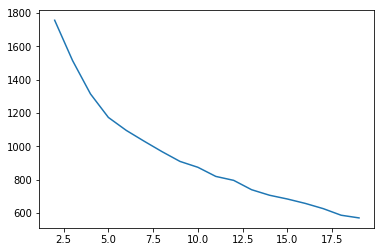

In [127]:
plt.plot(range(2,maxClusters),sse)

In [128]:
silh = []
for nClusters in range(2,maxClusters):
    kmeans = KMeans(n_clusters=nClusters, random_state=0).fit(dfNorm)
    silhouette_avg = silhouette_score(dfNorm, kmeans.labels_, sample_size = 10000)
    silh.append(silhouette_avg)

In [129]:
print(silh)

[0.18205829697745046, 0.20854857439999563, 0.20395011359776524, 0.16586146258104786, 0.13139435510860667, 0.13956218962579628, 0.14286988172050266, 0.13045090662212486, 0.11098614871172109, 0.1227069526835592, 0.13359983659449293, 0.12135855055685536, 0.11998097908199515, 0.11853534611488067, 0.12542089123261765, 0.11648783534093214, 0.127349608122626, 0.11932999520282757]


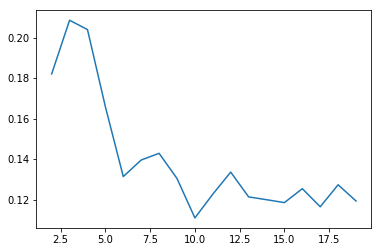

In [130]:
plt.plot(range(2,maxClusters),silh)

For n_clusters = 5 The average silhouette_score is : 0.16586146258104786
For n_clusters = 7 The average silhouette_score is : 0.13956218962579628
For n_clusters = 8 The average silhouette_score is : 0.1428698817205026
For n_clusters = 9 The average silhouette_score is : 0.13045090662212483
For n_clusters = 11 The average silhouette_score is : 0.12270695268355922


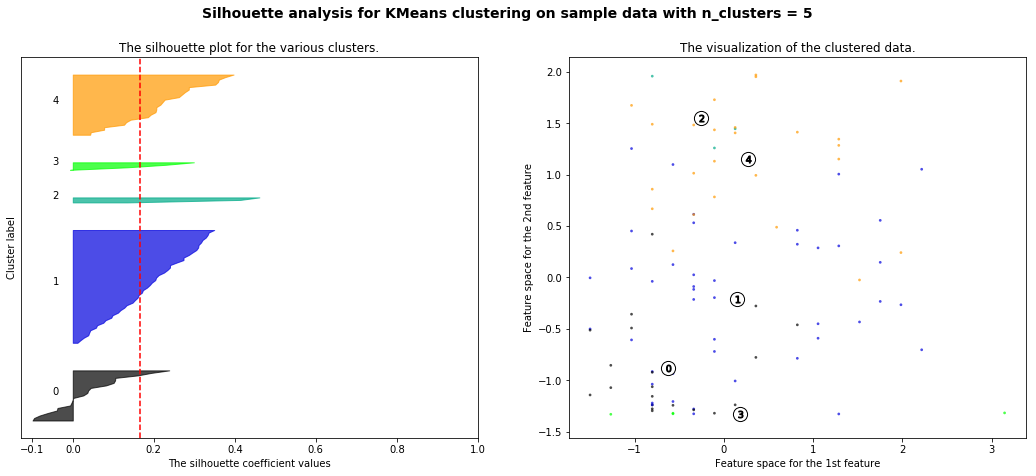

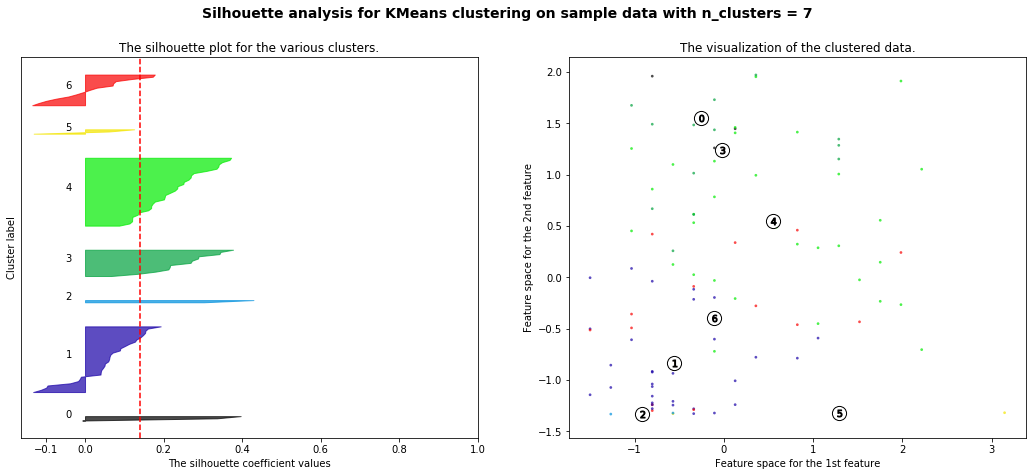

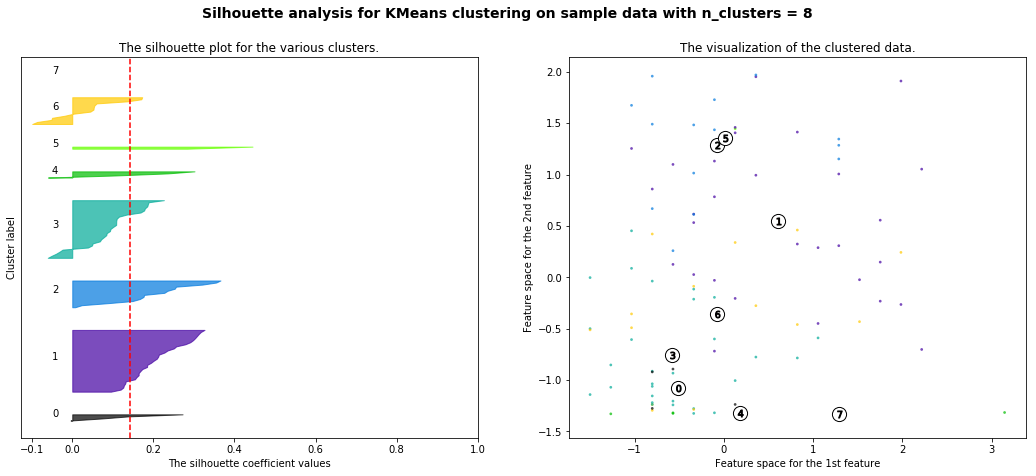

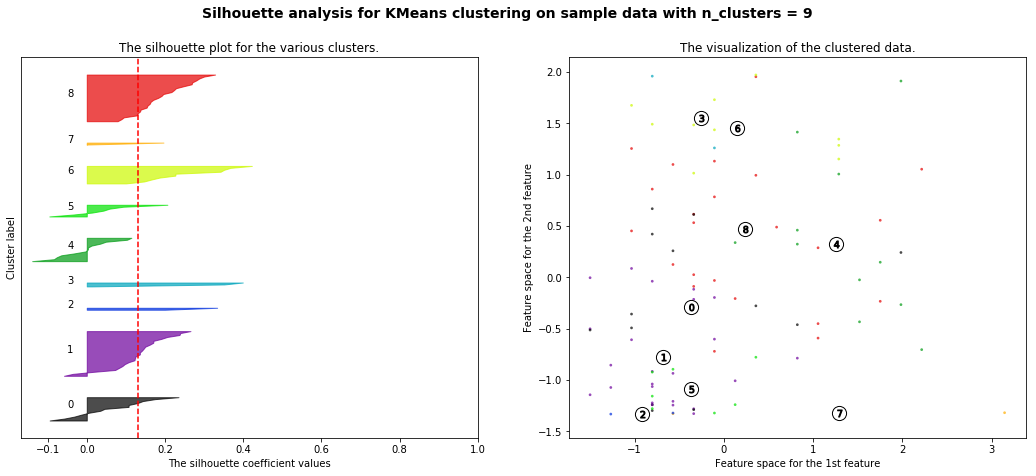

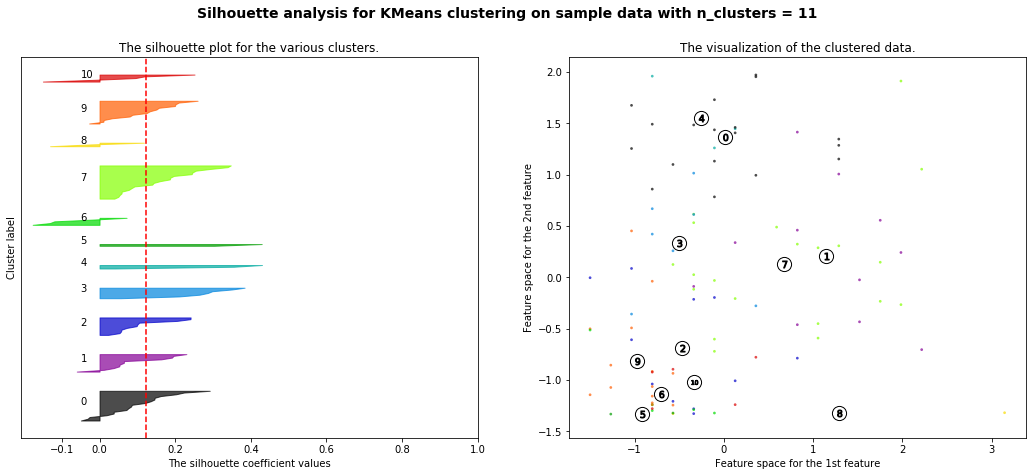

In [131]:
range_n_clusters = [5,7,8,9,11]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    #ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    #ax1.set_ylim([0, len(dfNorm) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels = kmeans.fit_predict(dfNorm)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(dfNorm, kmeans.labels_, sample_size = 10000)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(dfNorm, kmeans.labels_)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[kmeans.labels_ == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(dfNorm[:, 0], dfNorm[:, 1], marker='.', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k')

    # Labeling the clusters
    centers = kmeans.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

## K-Means Clustering

In [132]:
labels = KMeans(n_clusters=8, random_state=0).fit_predict(dfNorm)

In [133]:
pf_clust['Clusters'] = labels

In [134]:
pf['Clusters'] = labels

In [135]:
pf_clust['Clusters'].value_counts()

1    31
3    29
6    14
2    14
4     4
0     4
5     2
7     1
Name: Clusters, dtype: int64

In [136]:
pf_clust.groupby('Clusters').mean()

,Age,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
Clusters,,,,,,,,,,,,,,,,,,,,,
0,23.250000,179.250000,10.250000,0.521000,0.018000,0.893000,14.625000,21.625000,18.100000,9.175000,...,25.500000,13.100000,0.125000,0.200000,0.300000,0.068750,-5.050000,-0.325000,-5.375000,-0.125000
1,28.064516,1284.193548,12.029032,0.561516,0.546903,0.186323,4.306452,16.090323,10.200000,7.845161,...,10.267742,16.193548,1.112903,1.164516,2.274194,0.085742,-0.777419,-0.354839,-1.129032,0.296774
2,25.142857,1784.142857,19.185714,0.589857,0.326571,0.296500,5.492857,21.764286,13.642857,14.028571,...,11.271429,23.864286,2.835714,2.100000,4.921429,0.136571,2.128571,0.035714,2.157143,1.821429
3,22.965517,400.793103,10.406897,0.532207,0.336966,0.283379,6.955172,17.503448,12.224138,6.927586,...,13.868966,15.306897,0.068966,0.365517,0.437931,0.055862,-3.037931,-0.382759,-3.413793,-0.100000
4,26.250000,16.750000,-4.125000,0.139000,0.532750,0.166750,3.525000,24.275000,14.200000,12.650000,...,0.000000,18.950000,-0.100000,0.000000,-0.100000,-0.233750,-9.600000,-4.275000,-13.875000,-0.050000
5,25.500000,1826.000000,29.900000,0.611000,0.216500,0.480000,7.550000,28.300000,18.450000,24.250000,...,11.600000,33.550000,5.900000,4.450000,10.350000,0.272000,6.600000,3.450000,10.000000,5.500000
6,25.142857,670.785714,19.135714,0.602571,0.201214,0.319929,8.564286,20.207143,14.335714,14.607143,...,13.728571,20.328571,0.828571,0.814286,1.642857,0.144000,0.721429,0.664286,1.392857,0.428571
7,31.000000,14.000000,9.500000,0.357000,0.714000,0.000000,0.000000,52.800000,26.200000,20.100000,...,12.500000,23.600000,0.000000,0.000000,0.000000,-0.031000,-4.100000,0.700000,-3.400000,0.000000


In [137]:
pf[pf.Clusters == 0]

,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,...,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,Clusters
37,Donta Hall\halldo01,PF,22,DET,4,48,7.3,0.452,0.000,1.500,...,7.9,0.0,0.0,0.1,0.067,-5.6,-1.4,-7.1,-0.1,0
47,Amile Jefferson\jeffeam01,PF,26,ORL,18,74,8.9,0.372,0.000,1.000,...,13.5,0.0,0.1,0.0,0.023,-4.9,-1.0,-5.9,-0.1,0
83,Chris Silva\silvach01,PF,23,MIA,41,307,17.2,0.663,0.029,0.710,...,17.5,0.7,0.5,1.1,0.178,-3.4,0.9,-2.5,0.0,0
86,Caleb Swanigan\swanica01,PF,22,TOT,27,288,7.6,0.597,0.043,0.362,...,13.5,-0.2,0.2,0.0,0.007,-6.3,0.2,-6.0,-0.3,0


In [138]:
pf[pf.Clusters == 1]

,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,...,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,Clusters
5,Carmelo Anthony\anthoca01,PF,35,POR,50,1623,12.2,0.517,0.286,0.197,...,21.6,0.1,0.9,1.0,0.029,-1.9,-1.8,-3.7,-0.7,1
7,Harrison Barnes\barneha02,PF,27,SAC,64,2231,13.3,0.575,0.342,0.343,...,17.6,3.1,1.1,4.2,0.091,0.0,-1.2,-1.2,0.5,1
9,Dāvis Bertāns\bertada01,PF,27,WAS,54,1583,15.5,0.628,0.774,0.200,...,19.0,3.0,0.5,3.5,0.106,2.7,-1.8,0.9,1.1,1
14,Gary Clark\clarkga01,PF,25,TOT,35,425,10.3,0.534,0.851,0.089,...,10.9,0.5,0.4,0.9,0.098,-1.1,-1.1,-2.2,0.0,1
20,Robert Covington\covinro01,PF,29,TOT,62,1867,13.6,0.571,0.654,0.167,...,17.4,0.9,2.4,3.3,0.085,-1.0,1.1,0.1,1.0,1
25,Dorian Finney-Smith\finnedo01,PF,26,DAL,64,1898,12.2,0.597,0.580,0.212,...,12.7,2.9,1.6,4.5,0.114,0.0,-0.1,-0.2,0.9,1
28,Rudy Gay\gayru01,PF,33,SAS,60,1287,14.4,0.545,0.369,0.225,...,21.3,0.6,0.9,1.5,0.054,-0.5,-1.0,-1.5,0.2,1
31,Jerami Grant\grantje01,PF,25,DEN,64,1676,14.2,0.585,0.394,0.308,...,17.8,2.4,1.7,4.0,0.116,-0.1,-0.4,-0.4,0.7,1
33,JaMychal Green\greenja01,PF,29,LAC,55,1130,10.8,0.554,0.675,0.146,...,13.5,0.8,1.8,2.6,0.111,-1.4,0.6,-0.8,0.3,1
34,Jeff Green\greenje02,PF,33,TOT,40,754,12.8,0.575,0.529,0.280,...,18.9,0.6,0.8,1.4,0.089,-0.4,0.0,-0.5,0.3,1


In [139]:
pf[pf.Clusters == 2]

,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,...,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,Clusters
0,Bam Adebayo\adebaba01,PF,22,MIA,65,2235,20.6,0.606,0.018,0.476,...,20.8,4.6,3.6,8.1,0.175,1.6,2.1,3.6,3.2,2
10,Nemanja Bjelica\bjeline01,PF,31,SAC,64,1821,15.6,0.597,0.488,0.121,...,17.4,3.0,1.7,4.7,0.125,1.2,0.4,1.6,1.7,2
15,Brandon Clarke\clarkbr01,PF,23,MEM,50,1086,21.8,0.670,0.127,0.228,...,19.0,3.1,1.3,4.4,0.192,2.8,0.7,3.5,1.5,2
17,John Collins\collijo01,PF,22,ATL,41,1363,23.5,0.659,0.243,0.248,...,22.7,3.8,1.1,4.9,0.174,3.7,-0.7,3.1,1.7,2
27,Danilo Gallinari\gallida01,PF,31,OKC,55,1690,19.4,0.611,0.538,0.352,...,24.4,4.1,1.6,5.7,0.163,4.1,-0.9,3.2,2.2,2
30,Aaron Gordon\gordoaa01,PF,24,ORL,58,1914,14.8,0.511,0.311,0.280,...,20.6,1.2,2.2,3.3,0.084,-0.3,0.1,-0.3,0.8,2
38,Tobias Harris\harrito02,PF,27,PHI,65,2243,16.8,0.557,0.309,0.183,...,23.6,3.0,2.6,5.6,0.120,1.0,-0.4,0.6,1.5,2
45,Brandon Ingram\ingrabr01,PF,22,NOP,56,1919,19.2,0.590,0.352,0.328,...,28.2,3.2,1.7,4.9,0.122,2.7,-0.3,2.4,2.1,2
57,Kevin Love\loveke01,PF,31,CLE,56,1780,17.9,0.599,0.536,0.301,...,23.1,2.5,1.2,3.8,0.102,2.6,-0.6,2.1,1.8,2
76,Kristaps Porziņģis\porzikr01,PF,24,DAL,51,1597,19.3,0.540,0.447,0.282,...,26.6,1.7,2.6,4.3,0.129,1.2,0.3,1.5,1.4,2


In [140]:
pf[pf.Clusters == 3]

,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,...,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,Clusters
1,Al-Farouq Aminu\aminual01,PF,29,ORL,18,380,7.6,0.395,0.419,0.337,...,13.2,-0.4,0.5,0.1,0.016,-4.5,1.4,-3.1,-0.1,3
6,Marvin Bagley III\baglema01,PF,20,SAC,13,334,15.7,0.512,0.132,0.186,...,25.9,0.0,0.4,0.4,0.055,-2.1,-1.3,-3.4,-0.1,3
8,Darius Bazley\bazleda01,PF,19,OKC,53,909,8.1,0.475,0.435,0.204,...,14.1,-0.8,1.2,0.4,0.019,-3.1,0.6,-2.5,-0.1,3
11,Jonah Bolden\boldejo01,PF,24,TOT,7,47,4.9,0.392,0.364,0.364,...,13.4,-0.1,0.1,0.0,-0.008,-8.8,-0.1,-8.9,-0.1,3
16,Nicolas Claxton\claxtni01,PF,20,BRK,15,187,14.9,0.577,0.146,0.438,...,14.8,0.3,0.2,0.5,0.124,-0.7,0.0,-0.7,0.1,3
18,Zach Collins\colliza01,PF,22,POR,3,86,9.0,0.624,0.368,0.316,...,13.6,0.1,0.0,0.1,0.045,-1.1,-0.7,-1.7,0.0,3
23,Drew Eubanks\eubandr01,PF,22,SAS,14,130,15.3,0.776,0.036,0.393,...,14.3,0.2,0.1,0.3,0.120,-2.6,-1.0,-3.7,-0.1,3
24,Cristiano Felício\feliccr01,PF,27,CHI,22,386,12.8,0.671,0.037,0.426,...,9.1,0.7,0.3,1.0,0.126,-1.4,-1.6,-3.0,-0.1,3
26,Wenyen Gabriel\gabriwe01,PF,22,TOT,28,210,9.6,0.547,0.435,0.435,...,14.5,0.0,0.2,0.2,0.043,-3.9,0.0,-3.9,-0.1,3
35,Blake Griffin\griffbl01,PF,30,DET,18,512,11.9,0.476,0.444,0.392,...,28.4,-0.4,0.2,-0.1,-0.012,-1.7,-2.6,-4.2,-0.3,3


In [141]:
pf[pf.Clusters == 4]

,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,...,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,Clusters
22,Henry Ellenson\ellenhe01,PF,23,BRK,5,15,-1.2,0.143,0.571,0.000,...,19.5,-0.1,0.0,-0.1,-0.180,-7.9,-3.1,-11.0,0.0,4
39,Udonis Haslem\hasleud01,PF,39,MIA,3,21,3.0,0.322,0.333,0.667,...,16.3,0.0,0.0,0.0,-0.032,-9.7,-3.0,-12.7,-0.1,4
42,Kevin Hervey\herveke01,PF,23,OKC,7,19,-14.9,0.091,0.727,0.000,...,25.5,-0.2,0.0,-0.2,-0.471,-13.4,-6.5,-19.9,-0.1,4
78,Luka Šamanić\samanlu01,PF,20,SAS,1,12,-3.4,0.000,0.500,0.000,...,14.5,-0.1,0.0,-0.1,-0.252,-7.4,-4.5,-11.9,0.0,4


In [142]:
pf[pf.Clusters == 5]

,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,...,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,Clusters
4,Giannis Antetokounmpo\antetgi01,PF,25,MIL,57,1763,31.6,0.608,0.238,0.50,...,37.4,5.6,4.8,10.4,0.282,7.4,4.1,11.5,6.0,5
21,Anthony Davis\davisan02,PF,26,LAL,55,1889,28.2,0.614,0.195,0.46,...,29.7,6.2,4.1,10.3,0.262,5.8,2.8,8.5,5.0,5


In [143]:
pf[pf.Clusters == 6]

,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,...,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,Clusters
2,Kyle Anderson\anderky01,PF,26,MEM,59,1140,13.0,0.542,0.221,0.236,...,13.3,0.9,1.4,2.2,0.095,-1.3,1.9,0.6,0.7,6
12,Chris Boucher\bouchch01,PF,27,TOR,55,724,19.8,0.570,0.381,0.396,...,19.4,1.7,1.5,3.2,0.214,0.4,1.0,1.4,0.6,6
13,Marquese Chriss\chrisma01,PF,22,GSW,59,1196,19.4,0.604,0.101,0.405,...,19.0,2.1,1.3,3.4,0.136,0.1,0.5,0.6,0.8,6
19,Tyler Cook\cookty01,PF,22,CLE,11,35,23.8,0.752,0.000,0.600,...,16.7,0.2,0.0,0.2,0.244,3.0,-0.6,2.4,0.0,6
29,Harry Giles\gilesha01,PF,21,SAC,38,579,16.3,0.586,0.000,0.208,...,19.6,0.7,0.7,1.4,0.120,-2.2,1.1,-1.1,0.1,6
32,Draymond Green\greendr01,PF,29,GSW,43,1222,12.6,0.489,0.408,0.263,...,15.7,-0.2,1.3,1.1,0.044,-2.0,1.9,-0.2,0.6,6
40,John Henson\hensojo01,PF,29,TOT,40,600,17.0,0.578,0.211,0.269,...,16.3,0.6,0.8,1.4,0.109,-1.1,2.1,1.0,0.5,6
49,James Johnson\johnsja01,PF,32,TOT,32,619,14.8,0.572,0.423,0.223,...,19.4,0.4,0.8,1.2,0.089,-1.1,1.1,0.0,0.3,6
62,Chimezie Metu\metuch01,PF,22,SAS,16,73,25.4,0.597,0.029,0.229,...,25.9,0.2,0.1,0.2,0.159,3.8,-0.8,3.0,0.1,6
64,Paul Millsap\millspa01,PF,34,DEN,44,1075,17.7,0.598,0.282,0.326,...,20.3,2.0,1.4,3.4,0.151,0.6,0.0,0.6,0.7,6


In [144]:
pf[pf.Clusters == 7]

,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,...,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,Clusters
3,Ryan Anderson\anderry01,PF,31,HOU,2,14,9.5,0.357,0.714,0.0,...,23.6,0.0,0.0,0.0,-0.031,-4.1,0.7,-3.4,0.0,7


## Centers

In [166]:
center.head()

,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,...,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,Clusters
0,Steven Adams\adamsst01,C,26,OKC,58,1564,20.8,0.605,0.007,0.413,...,17.2,3.7,2.5,6.2,0.190,2.1,1.1,3.2,2.0,8
1,LaMarcus Aldridge\aldrila01,C,34,SAS,53,1754,19.8,0.571,0.198,0.241,...,23.6,3.1,1.4,4.4,0.122,1.8,-0.5,1.3,1.5,2
2,Jarrett Allen\allenja01,C,21,BRK,64,1647,20.3,0.658,0.012,0.574,...,15.0,4.3,2.8,7.1,0.207,1.0,1.1,2.1,1.7,8
3,Deandre Ayton\aytonde01,C,21,PHO,30,996,20.4,0.571,0.006,0.168,...,24.3,1.1,1.3,2.4,0.117,0.8,-0.4,0.5,0.6,2
4,Mo Bamba\bambamo01,C,21,ORL,60,868,17.8,0.549,0.369,0.163,...,17.2,0.9,1.7,2.5,0.140,-1.1,1.7,0.5,0.6,2


In [168]:
c_clust=center.drop(['Player','Pos','Tm','G'], axis=1)

In [169]:
c_clust.describe()

,Age,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,...,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,Clusters
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,...,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,25.911111,942.044444,16.818889,0.594311,0.185222,0.328056,9.723333,23.152222,16.431111,9.581111,...,17.813333,1.642222,1.285556,2.922222,0.132833,-0.676667,0.500000,-0.175556,0.728889,6.800000
std,4.063110,559.278607,4.648569,0.072757,0.200786,0.159318,3.824817,6.748187,4.517896,5.147551,...,4.873644,1.485131,0.970528,2.280783,0.060345,3.106573,1.344318,3.728280,0.959546,3.804787
min,19.000000,11.000000,4.200000,0.340000,0.000000,0.000000,0.000000,10.200000,8.300000,0.000000,...,6.000000,-1.000000,0.000000,0.000000,-0.066000,-18.300000,-3.300000,-21.300000,-0.700000,0.000000
25%,23.000000,473.250000,14.025000,0.553250,0.012000,0.213000,7.600000,18.875000,13.125000,6.125000,...,14.850000,0.525000,0.500000,1.100000,0.102000,-1.575000,-0.300000,-1.400000,0.100000,2.000000
50%,26.000000,942.500000,16.900000,0.593500,0.104000,0.282500,9.950000,23.050000,16.250000,8.650000,...,16.550000,1.200000,1.100000,2.650000,0.129000,-0.250000,0.400000,0.300000,0.350000,8.000000
75%,28.000000,1338.000000,20.000000,0.641750,0.328750,0.419500,12.100000,26.400000,18.875000,11.175000,...,20.800000,2.575000,1.950000,4.475000,0.180500,0.875000,1.275000,1.800000,1.100000,10.000000
max,37.000000,2159.000000,26.500000,0.726000,0.755000,0.800000,19.600000,48.700000,33.600000,34.300000,...,32.600000,6.000000,4.000000,10.000000,0.242000,7.000000,4.400000,7.800000,5.100000,15.000000


In [170]:
scaler = preprocessing.StandardScaler().fit(c_clust)
dfNorm = scaler.transform(c_clust)

/Users/charlesmarshall/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/charlesmarshall/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  


In [171]:
maxClusters = 20
sse = []
for nClusters in range(2,maxClusters):
    kmeans = KMeans(n_clusters=nClusters, random_state=0).fit(dfNorm)
    sse.append(kmeans.inertia_)

In [172]:
print(sse)

[1627.599872939842, 1389.0651503915878, 1230.994264791235, 1135.6790065834336, 1055.822326325635, 1015.2324350943625, 955.490151793113, 904.1085812604825, 860.0762763187457, 804.4870264538274, 771.3986370471962, 753.7732203014758, 718.219460480803, 696.3339332257948, 659.8192028709489, 620.1906038843554, 614.8943274719327, 593.3735901442617]


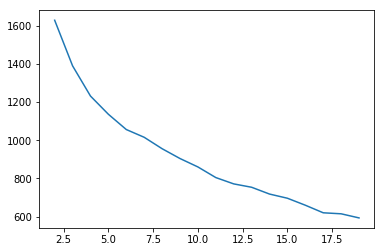

In [173]:
plt.plot(range(2,maxClusters),sse)

In [174]:
silh = []
for nClusters in range(2,maxClusters):
    kmeans = KMeans(n_clusters=nClusters, random_state=0).fit(dfNorm)
    silhouette_avg = silhouette_score(dfNorm, kmeans.labels_, sample_size = 10000)
    silh.append(silhouette_avg)

In [175]:
print(silh)

[0.18223027861108726, 0.1707279953373754, 0.1810600242309503, 0.1587822893763563, 0.14661547293071947, 0.11509607340021903, 0.12252214452958007, 0.14645049282990633, 0.11429839128449354, 0.1160702529525978, 0.11450642799524059, 0.11307655880050375, 0.09486458077150312, 0.09619583151806776, 0.10643378303807904, 0.12233133308876448, 0.10160722596740172, 0.10959705379709864]


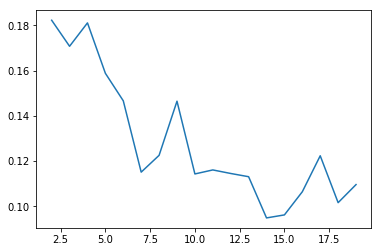

In [176]:
plt.plot(range(2,maxClusters),silh)

For n_clusters = 5 The average silhouette_score is : 0.1587822893763563
For n_clusters = 6 The average silhouette_score is : 0.14661547293071944
For n_clusters = 7 The average silhouette_score is : 0.11509607340021905
For n_clusters = 10 The average silhouette_score is : 0.1142983912844935
For n_clusters = 14 The average silhouette_score is : 0.09486458077150309
For n_clusters = 15 The average silhouette_score is : 0.09619583151806774


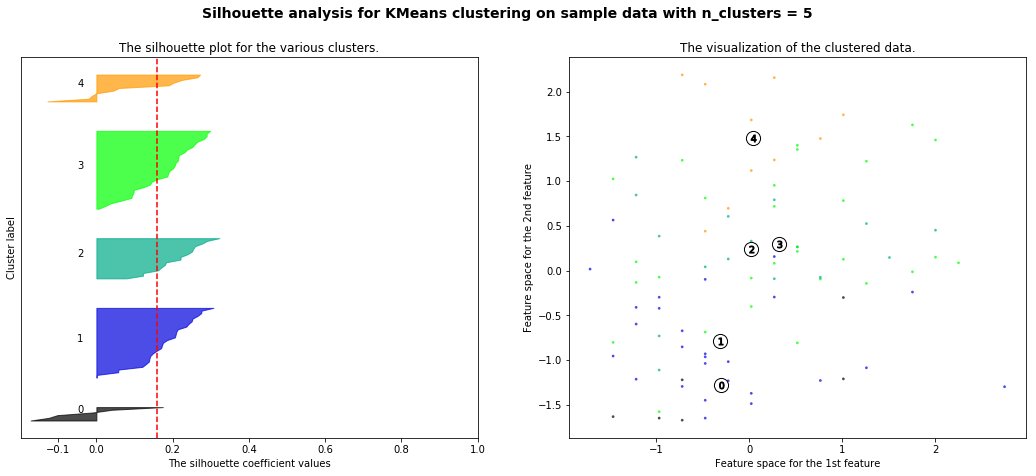

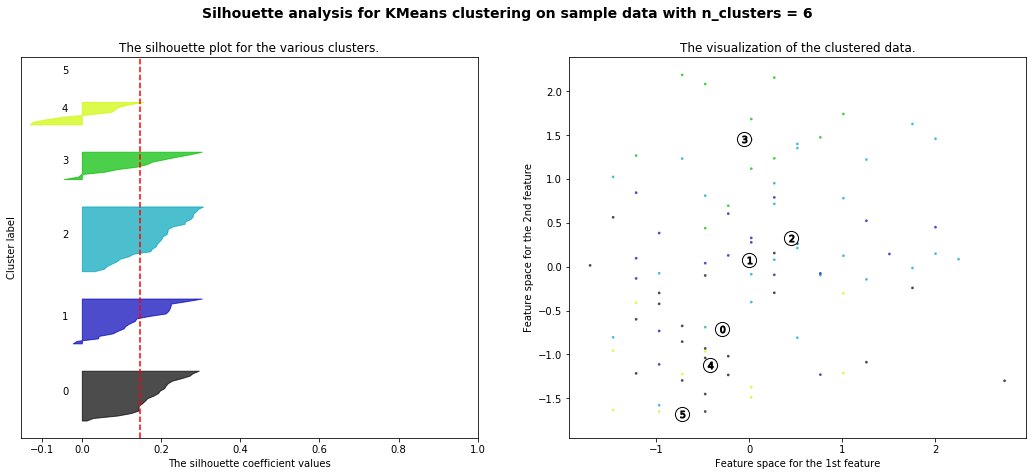

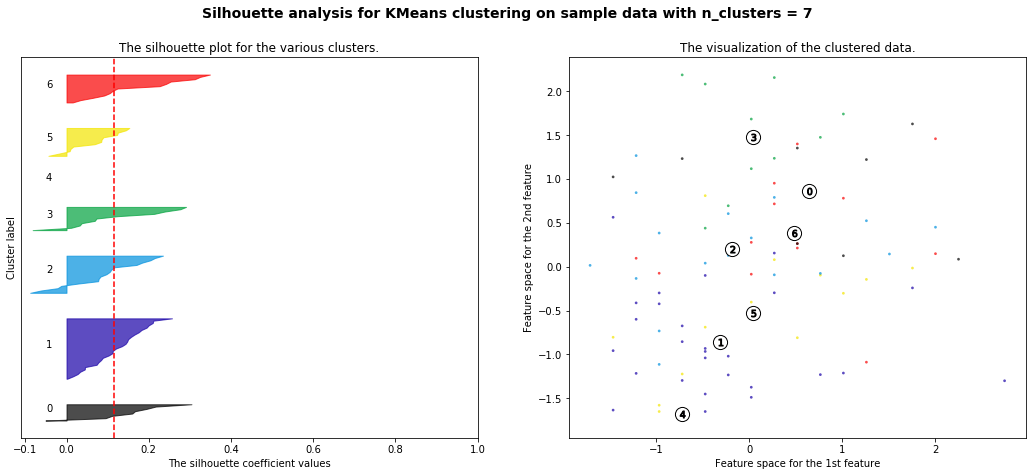

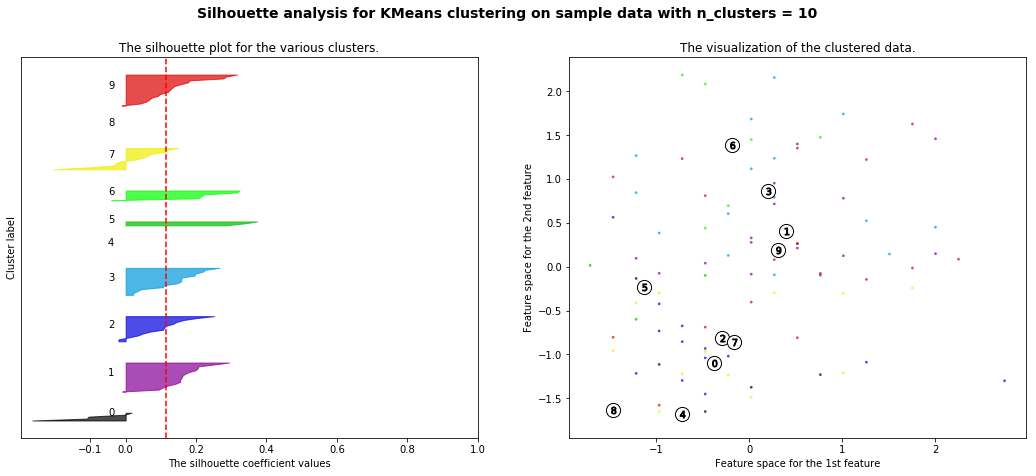

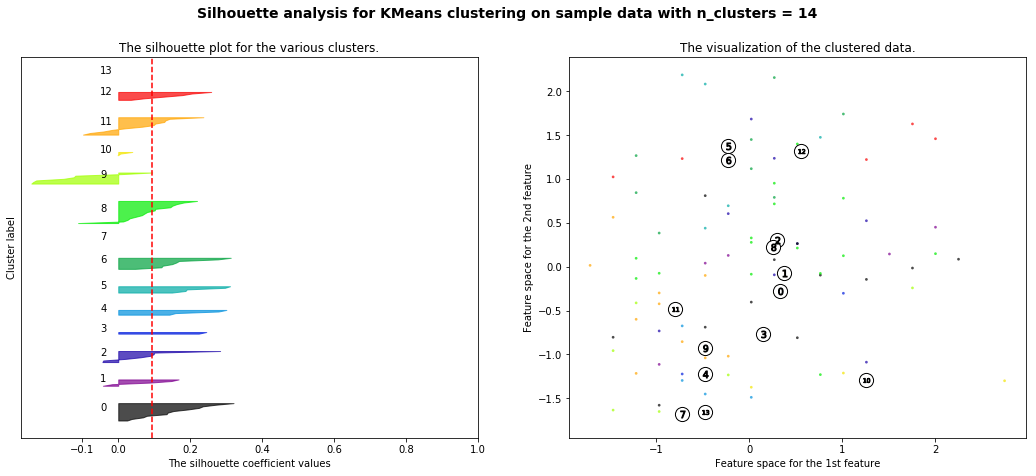

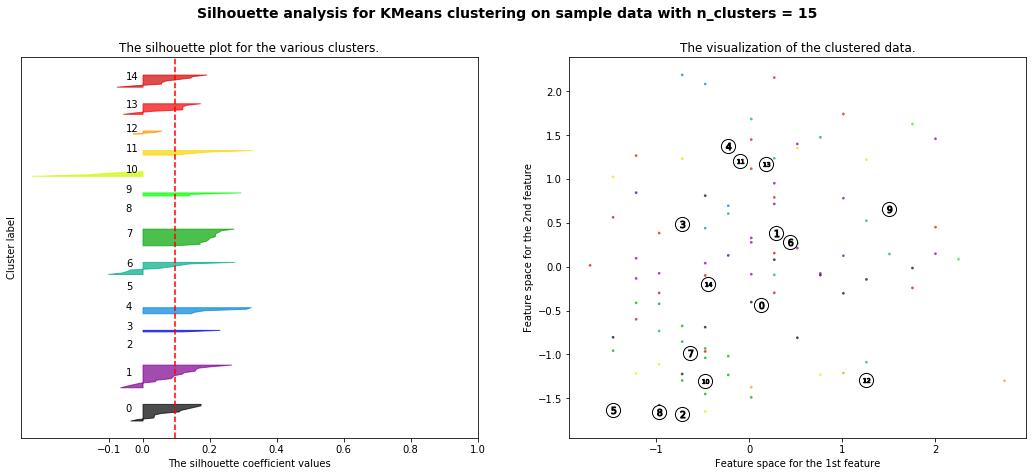

In [177]:
range_n_clusters = [5,6,7,10,14,15]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    #ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    #ax1.set_ylim([0, len(dfNorm) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels = kmeans.fit_predict(dfNorm)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(dfNorm, kmeans.labels_, sample_size = 10000)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(dfNorm, kmeans.labels_)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[kmeans.labels_ == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(dfNorm[:, 0], dfNorm[:, 1], marker='.', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k')

    # Labeling the clusters
    centers = kmeans.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

## K-Means Clustering

In [178]:
labels = KMeans(n_clusters=7, random_state=0).fit_predict(dfNorm)

In [179]:
c_clust['Clusters'] = labels

In [180]:
center['Clusters'] = labels

In [181]:
c_clust['Clusters'].value_counts()

1    27
2    17
6    13
5    13
3    11
0     8
4     1
Name: Clusters, dtype: int64

In [182]:
c_clust.groupby('Clusters').mean()

,Age,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
Clusters,,,,,,,,,,,,,,,,,,,,,
0,28.500000,1424.500000,14.775000,0.570875,0.497375,0.208250,4.875000,18.787500,11.962500,10.775000,...,11.287500,17.212500,1.550000,2.187500,3.700000,0.125625,-0.125000,1.337500,1.212500,1.112500
1,24.629630,464.666667,14.518519,0.591333,0.093963,0.403556,9.870370,22.900000,16.311111,7.670370,...,16.585185,15.655556,0.588889,0.481481,1.066667,0.104111,-2.500000,0.303704,-2.207407,-0.011111
2,25.176471,1052.823529,20.135294,0.653118,0.041941,0.400118,12.705882,24.364706,18.576471,8.458824,...,13.817647,15.400000,2.617647,1.794118,4.400000,0.199765,0.452941,1.582353,2.047059,1.076471
3,26.090909,1764.909091,23.154545,0.609273,0.133182,0.384364,10.918182,29.009091,20.000000,16.018182,...,13.445455,23.918182,3.990909,2.800000,6.800000,0.185273,2.990909,1.027273,4.009091,2.636364
4,23.000000,11.000000,4.200000,0.340000,0.200000,0.400000,19.600000,47.000000,33.600000,0.000000,...,14.500000,26.800000,0.000000,0.000000,0.000000,0.003000,-18.300000,-3.000000,-21.300000,-0.100000
5,26.076923,650.230769,12.353846,0.538231,0.465077,0.162769,5.623077,18.269231,11.930769,9.484615,...,11.176923,18.769231,0.407692,0.669231,1.084615,0.072308,-1.700000,-0.453846,-2.138462,0.061538
6,27.846154,1158.923077,18.592308,0.601000,0.133077,0.262846,10.830769,22.869231,16.784615,9.669231,...,11.992308,19.007692,1.984615,1.169231,3.146154,0.135538,0.569231,-0.246154,0.330769,0.692308


In [183]:
center[center.Clusters == 0]

,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,...,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,Clusters
20,Gorgui Dieng\dienggo01,C,30,TOT,58,1012,17.4,0.564,0.414,0.242,...,17.7,1.1,1.6,2.7,0.128,0.0,1.8,1.8,0.9,0
27,Marc Gasol\gasolma01,C,35,TOR,36,990,11.9,0.546,0.538,0.153,...,12.7,0.9,1.8,2.7,0.128,-0.9,2.7,1.8,0.9,0
36,Al Horford\horfoal01,C,33,PHI,60,1848,15.6,0.526,0.404,0.112,...,17.6,2.5,2.5,5.0,0.130,1.1,1.1,2.2,2.0,0
39,Jaren Jackson Jr.\jacksja02,C,20,MEM,54,1512,16.1,0.590,0.485,0.237,...,23.9,1.5,1.7,3.1,0.100,0.2,0.0,0.2,0.8,0
46,Maxi Kleber\klebima01,C,28,DAL,66,1695,13.8,0.603,0.614,0.172,...,13.9,2.9,1.7,4.6,0.131,0.5,0.2,0.6,1.1,0
52,Brook Lopez\lopezbr01,C,31,MIL,61,1622,14.0,0.537,0.497,0.212,...,17.5,0.8,3.9,4.6,0.137,-1.1,2.8,1.8,1.5,0
64,Kelly Olynyk\olynyke01,C,28,MIA,59,1089,14.7,0.640,0.584,0.259,...,16.9,1.7,1.5,3.2,0.140,0.1,1.0,1.1,0.8,0
79,Myles Turner\turnemy01,C,23,IND,55,1628,14.7,0.561,0.443,0.279,...,17.5,1.0,2.8,3.7,0.111,-0.9,1.1,0.2,0.9,0


In [184]:
center[center.Clusters == 1]

,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,...,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,Clusters
6,Jordan Bell\belljo01,C,25,TOT,29,256,13.9,0.577,0.179,0.463,...,16.4,0.2,0.2,0.4,0.070,-1.4,-1.1,-2.5,0.0,1
7,Khem Birch\birchkh01,C,27,ORL,40,777,10.1,0.529,0.009,0.583,...,9.3,0.7,0.8,1.5,0.092,-3.3,0.3,-3.0,-0.2,1
8,Goga Bitadze\bitadgo01,C,20,IND,49,410,12.2,0.530,0.279,0.256,...,18.1,-0.1,0.7,0.6,0.069,-4.0,1.5,-2.5,0.0,1
9,Bismack Biyombo\biyombi01,C,27,CHO,53,1029,16.1,0.570,0.000,0.543,...,16.8,1.5,0.9,2.4,0.113,-1.8,-0.7,-2.5,-0.1,1
11,Moses Brown\brownmo01,C,20,POR,9,33,6.7,0.407,0.000,0.800,...,21.2,-0.1,0.0,0.0,-0.062,-8.2,-1.7,-9.9,-0.1,1
14,Wendell Carter Jr.\cartewe01,C,20,CHI,43,1256,15.5,0.590,0.085,0.443,...,16.4,1.7,1.6,3.3,0.127,-2.1,-0.3,-2.4,-0.1,1
16,Tyson Chandler\chandty01,C,37,HOU,26,219,10.8,0.717,0.000,0.722,...,6.0,0.3,0.3,0.6,0.130,-2.5,1.1,-1.4,0.0,1
17,Ed Davis\davised01,C,30,UTA,25,268,7.3,0.425,0.000,0.324,...,8.5,-0.1,0.5,0.4,0.074,-5.5,1.7,-3.9,-0.1,1
19,Cheick Diallo\diallch01,C,23,PHO,44,467,16.3,0.688,0.015,0.270,...,16.7,0.8,0.5,1.3,0.129,-1.1,-0.3,-1.4,0.1,1
23,Tacko Fall\fallta01,C,24,BOS,6,24,23.9,0.713,0.000,0.250,...,29.0,0.0,0.1,0.1,0.102,-2.0,3.1,1.0,0.0,1


In [185]:
center[center.Clusters == 2]

,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,...,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,Clusters
2,Jarrett Allen\allenja01,C,21,BRK,64,1647,20.3,0.658,0.012,0.574,...,15.0,4.3,2.8,7.1,0.207,1.0,1.1,2.1,1.7,2
4,Mo Bamba\bambamo01,C,21,ORL,60,868,17.8,0.549,0.369,0.163,...,17.2,0.9,1.7,2.5,0.140,-1.1,1.7,0.5,0.6,2
10,Tony Bradley\bradlto01,C,22,UTA,50,535,21.8,0.675,0.006,0.258,...,16.1,1.8,0.9,2.7,0.242,0.9,0.4,1.3,0.4,2
13,Clint Capela\capelca01,C,25,HOU,39,1279,20.7,0.626,0.000,0.268,...,16.0,2.9,2.1,5.0,0.186,1.1,0.4,1.5,1.1,2
32,Jaxson Hayes\hayesja02,C,19,NOP,56,951,17.8,0.675,0.017,0.736,...,15.1,2.5,1.0,3.5,0.176,-0.8,0.8,0.1,0.5,2
35,Richaun Holmes\holmeri01,C,26,SAC,39,1125,20.5,0.685,0.000,0.312,...,16.0,3.2,1.5,4.6,0.198,0.6,0.9,1.5,1.0,2
37,Dwight Howard\howardw01,C,34,LAL,62,1193,18.7,0.696,0.019,0.700,...,14.5,2.6,2.4,5.0,0.202,-0.8,1.4,0.5,0.8,2
42,DeAndre Jordan\jordade01,C,31,BRK,56,1234,20.0,0.682,0.000,0.425,...,14.1,3.0,2.3,5.3,0.204,1.1,1.8,2.8,1.5,2
45,Enes Kanter\kanteen01,C,27,BOS,51,891,22.0,0.594,0.023,0.286,...,19.3,2.1,1.7,3.8,0.207,1.6,-0.1,1.5,0.8,2
57,JaVale McGee\mcgeeja01,C,32,LAL,61,1023,20.0,0.655,0.021,0.265,...,15.0,2.2,2.3,4.5,0.211,-0.3,2.3,2.1,1.1,2


In [186]:
center[center.Clusters == 3]

,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,...,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,Clusters
0,Steven Adams\adamsst01,C,26,OKC,58,1564,20.8,0.605,0.007,0.413,...,17.2,3.7,2.5,6.2,0.190,2.1,1.1,3.2,2.0,3
21,Andre Drummond\drumman01,C,26,TOT,57,1879,22.0,0.553,0.045,0.375,...,25.9,0.7,3.6,4.3,0.109,-0.1,1.1,1.0,1.4,3
22,Joel Embiid\embiijo01,C,25,PHI,44,1329,26.0,0.593,0.230,0.545,...,32.6,3.2,2.4,5.6,0.203,4.1,1.2,5.2,2.4,3
29,Rudy Gobert\goberru01,C,27,UTA,62,2142,21.7,0.700,0.000,0.725,...,16.1,6.0,4.0,10.0,0.225,1.8,1.9,3.7,3.1,3
30,Montrezl Harrell\harremo01,C,26,LAC,63,1749,23.1,0.607,0.022,0.432,...,25.5,4.5,2.5,7.0,0.193,2.4,0.5,2.9,2.2,3
40,Nikola Jokić\jokicni01,C,24,DEN,65,2101,25.0,0.604,0.233,0.277,...,26.6,6.0,3.2,9.2,0.209,5.4,2.3,7.6,5.1,3
75,Domantas Sabonis\sabondo01,C,23,IND,62,2159,20.7,0.586,0.079,0.349,...,23.4,4.2,3.3,7.6,0.168,2.1,1.1,3.2,2.9,3
78,Karl-Anthony Towns\townska01,C,24,MIN,35,1187,26.5,0.642,0.445,0.363,...,28.8,3.8,1.3,5.1,0.205,7.0,0.8,7.8,2.9,3
80,Jonas Valančiūnas\valanjo01,C,27,MEM,62,1630,22.3,0.631,0.120,0.256,...,21.4,3.8,2.4,6.2,0.182,2.2,0.0,2.3,1.8,3
82,Nikola Vučević\vucevni01,C,29,ORL,54,1763,21.6,0.540,0.274,0.160,...,25.8,2.9,2.6,5.5,0.150,3.4,0.6,4.0,2.7,3


In [187]:
center[center.Clusters == 4]

,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,...,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,Clusters
33,Dewan Hernandez\hernade01,C,23,TOR,4,11,4.2,0.34,0.2,0.4,...,26.8,0.0,0.0,0.0,0.003,-18.3,-3.0,-21.3,-0.1,4


In [188]:
center[center.Clusters == 5]

,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,...,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,Clusters
5,Aron Baynes\baynear01,C,33,PHO,42,934,15.1,0.581,0.441,0.197,...,21.1,1.3,0.7,2.0,0.103,-0.2,-0.9,-1.1,0.2,5
18,Dewayne Dedmon\dedmode01,C,30,TOT,44,774,9.4,0.473,0.420,0.141,...,18.2,-1.0,1.1,0.1,0.006,-5.8,0.0,-5.8,-0.7,5
43,Mfiondu Kabengele\kabenmf01,C,22,LAC,12,64,18.2,0.614,0.625,0.156,...,23.5,0.1,0.1,0.2,0.175,2.2,-0.1,2.1,0.1,5
44,Frank Kaminsky\kaminfr01,C,26,PHO,32,718,14.5,0.554,0.401,0.315,...,20.8,0.8,0.6,1.4,0.092,0.2,-0.3,-0.1,0.3,5
47,Luke Kornet\kornelu01,C,24,CHI,36,559,12.7,0.539,0.578,0.150,...,16.3,0.5,0.5,1.1,0.091,-0.9,-0.2,-1.1,0.1,5
50,Meyers Leonard\leoname01,C,27,MIA,49,987,11.1,0.640,0.534,0.117,...,12.0,1.0,1.1,2.1,0.104,-1.0,0.4,-0.6,0.3,5
51,Kevon Looney\looneke01,C,23,GSW,20,262,9.4,0.403,0.177,0.152,...,15.7,-0.2,0.2,0.0,0.005,-4.8,-0.8,-5.5,-0.2,5
53,Robin Lopez\lopezro01,C,31,MIL,60,862,11.1,0.565,0.352,0.158,...,16.6,0.2,1.5,1.7,0.095,-2.4,0.5,-1.9,0.0,5
58,Nicolò Melli\mellini01,C,29,NOP,52,889,12.3,0.583,0.647,0.216,...,15.9,1.0,0.8,1.8,0.095,-0.9,0.3,-0.6,0.3,5
59,Mike Muscala\muscami01,C,28,OKC,41,492,12.2,0.560,0.755,0.138,...,16.4,0.5,0.5,1.0,0.102,-0.1,-0.1,-0.2,0.2,5


In [189]:
center[center.Clusters == 6]

,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,...,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,Clusters
1,LaMarcus Aldridge\aldrila01,C,34,SAS,53,1754,19.8,0.571,0.198,0.241,...,23.6,3.1,1.4,4.4,0.122,1.8,-0.5,1.3,1.5,6
3,Deandre Ayton\aytonde01,C,21,PHO,30,996,20.4,0.571,0.006,0.168,...,24.3,1.1,1.3,2.4,0.117,0.8,-0.4,0.5,0.6,6
12,Thomas Bryant\bryanth01,C,22,WAS,38,901,20.0,0.659,0.176,0.309,...,18.3,2.4,0.5,2.9,0.153,2.1,-1.2,0.9,0.7,6
15,Willie Cauley-Stein\caulewi01,C,26,TOT,54,1097,17.0,0.589,0.003,0.219,...,14.4,1.5,1.5,3.0,0.129,-1.2,1.7,0.5,0.7,6
24,Derrick Favors\favorde01,C,28,NOP,45,1089,19.0,0.624,0.023,0.203,...,14.4,2.4,1.4,3.8,0.168,0.8,0.4,1.2,0.9,6
28,Taj Gibson\gibsota01,C,34,NYK,62,1025,16.1,0.610,0.049,0.196,...,14.8,1.8,0.8,2.6,0.120,-0.7,-0.4,-1.1,0.2,6
38,Serge Ibaka\ibakase01,C,30,TOR,50,1377,18.0,0.593,0.266,0.191,...,24.1,1.5,2.4,3.9,0.136,0.5,-0.1,0.4,0.9,6
49,Alex Len\lenal01,C,26,TOT,49,895,18.0,0.596,0.185,0.301,...,18.3,1.4,0.9,2.3,0.122,-0.2,-0.2,-0.5,0.3,6
56,Boban Marjanović\marjabo01,C,31,DAL,37,337,24.5,0.599,0.087,0.272,...,27.9,0.8,0.5,1.3,0.184,1.7,-1.7,0.0,0.2,6
60,Larry Nance Jr.\nancela02,C,27,CLE,56,1472,17.3,0.608,0.369,0.172,...,15.2,2.8,1.1,3.9,0.128,1.4,0.3,1.8,1.4,6
